In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import RandomOverSampler

In [2]:
# Display all columns
pd.set_option("display.max_columns", None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
# Import dataset
data = pd.read_csv('company_bankruptcy.csv')

data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.37059,0.42439,0.40575,0.60146,0.60146,0.99897,0.79689,0.80881,0.30265,0.78098,0.00013,0.00000,0.45814,0.00073,0.00000,0.14795,0.14795,0.14795,0.16914,0.31166,0.01756,0.09592,0.13874,0.02210,0.84819,0.68898,0.68898,0.21754,4980000000.00000,0.00033,0.26310,0.36373,0.00226,0.00121,0.62995,0.02127,0.20758,0.79242,0.00502,0.39028,0.00648,0.09588,0.13776,0.39804,0.08696,0.00181,0.00349,0.00018,0.00012,0.03290,0.03416,0.39291,0.03714,0.67278,0.16667,0.19064,0.00409,0.00200,0.00015,0.14731,0.33402,0.27692,0.00104,0.67627,0.72127,0.33908,0.02559,0.90322,0.00202,0.06486,701000000.00000,6550000000.00000,0.59383,458000000.00000,0.67157,0.42421,0.67627,0.33908,0.12655,0.63756,0.45861,0.52038,0.31290,0.11825,0,0.71685,0.00922,0.62288,0.60145,0.82789,0.29020,0.02660,0.56405,1,0.01647
1,1,0.46429,0.53821,0.51673,0.61024,0.61024,0.99895,0.79738,0.80930,0.30356,0.78151,0.00029,0.00000,0.46187,0.00065,0.00000,0.18225,0.18225,0.18225,0.20894,0.31814,0.02114,0.09372,0.16992,0.02208,0.84809,0.68969,0.68970,0.21762,6110000000.00000,0.00044,0.26452,0.37671,0.00602,0.00404,0.63517,0.01250,0.17118,0.82882,0.00506,0.37676,0.00584,0.09374,0.16896,0.39772,0.06447,0.00129,0.00492,9360000000.00000,719000000.00000,0.02548,0.00689,0.39159,0.01233,0.75111,0.12724,0.18242,0.01495,0.00414,0.00138,0.05696,0.34111,0.28964,0.00521,0.30859,0.731

In [4]:
# 96 columns, including the target variable

# No null values.
# All columns are numbers (int or float).
# 3 columns are int and remainder are float.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [5]:
# Column names have a space character before their names, cleaning it
data.rename(columns={c: c.strip() for c in data.columns.values.tolist()}, inplace=True)

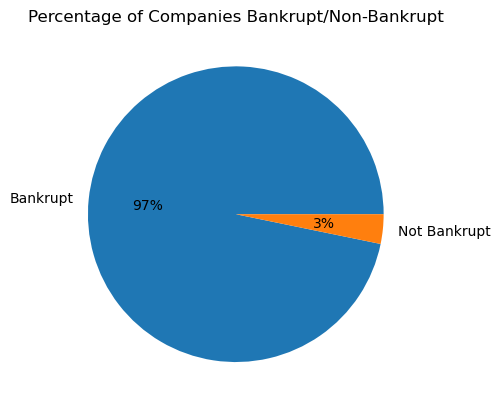

In [6]:
# Plot Bar Chart showing the percent of cases for each class
bankrupt = data['Bankrupt?'].map({1: "Bankrupt", 0: "Not Bankrupt"})

plt.pie(bankrupt.value_counts(), labels=bankrupt.unique(), autopct='%.0f%%')

plt.title("Percentage of Companies Bankrupt/Non-Bankrupt")
plt.show()

# Imbalanced dataset

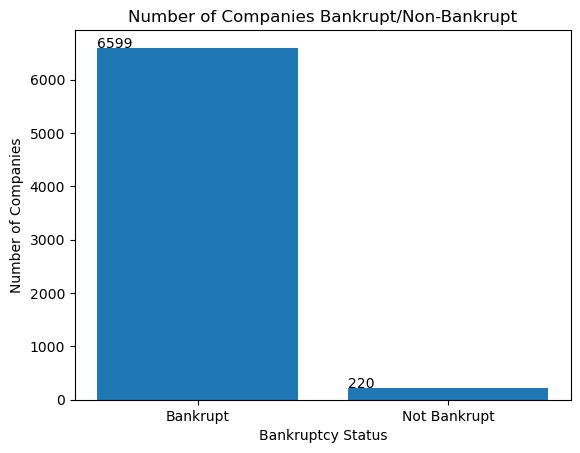

In [7]:
# Plot Bar Chart showing the number of cases for each class
bars = plt.bar(bankrupt.unique() , height=bankrupt.value_counts(), label=bankrupt.unique())

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .01, yval)

plt.xlabel("Bankruptcy Status")
plt.ylabel("Number of Companies")
plt.title("Number of Companies Bankrupt/Non-Bankrupt")
plt.show()

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      6599
           1       0.00      0.00      0.00       220

    accuracy                           0.97      6819
   macro avg       0.48      0.50      0.49      6819
weighted avg       0.94      0.97      0.95      6819



/Users/tanyongjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tanyongjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tanyongjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot: >

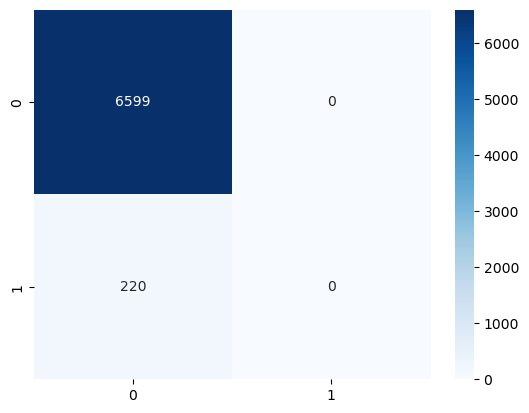

In [8]:
# Accuracy will be very high, using F1 score instead.
# Calculating base Accuracy, Precision, Recall, F1 score
# Base is assuming model predicting all are non-bankrupt

labels = bankrupt.unique()

# Base Model predicting all 0 (Not Bankrupt)
pred = [0] * 6819

report = classification_report(data['Bankrupt?'],pred)
print("-"*100)
print(report)

cm = confusion_matrix(data['Bankrupt?'],pred)
sns.heatmap(cm,annot=True,fmt="d",cmap = "Blues")

# If a model that picks all companies are not bankrupt, it would have an accuracy of 96.7%
# but it would score badly on other kind of metrics.

In [9]:
# There are 2 more columns with int instead of float (excluding Bankruptcy Status)
# I believe they are binary flags (1/0)

print("Liability-Assets Flag values are: ", data['Liability-Assets Flag'].unique())

# 'Net Income Flag' are all '1'. 
print("Net Income FLag values are: ", data['Net Income Flag'].unique()) 

# Dropping this column, as it provides no further useful information for analysis
data.drop('Net Income Flag',axis=1,inplace=True)

Liability-Assets Flag values are:  [0 1]
Net Income FLag values are:  [1]


In [10]:
# Too many columns to make sense of
# But I can see that some columns have small numbers (< 1), while some columns have large values
data.describe()

# retrieve columns with 0 variance (Uniform values)
data.var().sort_values(ascending=True)

# No more columns with 0 variance.

Working capitcal Turnover Rate                            0.00008
Cash Flow to Sales                                        0.00009
Total Asset Return Growth Rate Ratio                      0.00009
Continuous Net Profit Growth Rate                         0.00010
Inventory/Working Capital                                 0.00011
                                                  ...            
Total Asset Growth Rate                 8396768281352894464.00000
Cash Turnover Rate                      8635506468376178688.00000
Operating Expense Rate                 10482596974948829184.00000
Inventory Turnover Rate (times)        10549289724343259136.00000
Quick Asset Turnover Rate              11390249717712418816.00000
Length: 95, dtype: float64

In [11]:
# What makes a bankrupt company different?
data.groupby(by='Bankrupt?').mean()

# There are some metrics that differ, which I can pick up via browsing:
# - ROA related metrics
# - Operating Expense Rate
# - R&D Expenses Rate
# - Tax Rate (Interesting, all are 'Taiwanese' companies, they should have the same tax rate?)
# - Net Value per Share
# - EPS
# - Revenue per Share
# - Operating Profit
# - Net Profit
# - Net Asset Growth Rate

# Although all these metrics should be obvious to anybody. 
# A good company should have high ROA, R&D, NAV, EPS, Revenue and Profit.

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
Bankrupt?,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.50807,0.56201,0.55666,0.60826,0.60824,0.99876,0.79721,0.80911,0.30366,0.78140,1998943222.60991,1961922518.56365,0.46766,16903924.83793,0.11778,0.19167,0.19164,0.19168,0.23015,0.32373,1372935.33258,0.10982,0.18558,0.02241,0.84801,0.68924,0.68924,0.21766,5531602816.03292,204576.45168,0.26428,0.37987,416729.82291,7257160.18707,0.63100,4037732.99700,0.11071,0.88929,0.00870,0.37413,0.00581,0.10969,0.18388,0.40228,0.14286,13031216.85317,10133050.46979,2149921927.56589,975657432.94639,0.03845,1335050.80075,0.40123,11103682.39151,0.81621,0.40332,0.52406,0.12664,3712683.75194,29899530.24529,0.08889,0.35432,0.27740,55719442.34883,0.76238,0.73613,0.33103,54078996.82443,0.93575,0.00256,0.02849,1189711557.81232,2147829492.34774,0.59401,2481653241.55217,0.67153,0.24689,0.76238,0.33103,0.11515,0.65034,0.46209,0.59465,0.31572,0.03054,0.00030,0.81008,16216699.50847,0.62393,0.60826,0.84088,0.27992,0.02751,0.56537,0.04834
1,0.41850,0.45695,0.46148,0.59867,0.59872,0.99874,0.79659,0.80842,0.30261,0.78080,1887486363.63666,1605623181.81825,0.46068,2772727.27324,0.03169,0.16042,0.16030,0.16046,0.18882,0.31601,0.02732,0.08735,0.14777,0.02238,0.84709,0.68628,0.68635,0.21712,4803016818.18182,42409090.90948,0.26336,0.37385,0.00724,41954545.45877,0.63083,15772

In [12]:
# Let pick up some commonly used financial ratios 
# and see if there are any differences between a good and a bad company.

# I picked up 8 columns which I think are important health indicators for a company
common_financial_ratios = ['Bankrupt?',
                           'Realized Sales Gross Margin', # Gross Margin
                           'Operating Profit Rate',  # Net Profit
                           'Cash flow rate', # Cash Flow
                           'Current Ratio', # current asset / current liabilites
                           'Debt ratio %', # total debt / total assets
                           'Inventory Turnover Rate (times)', # inventory turnover
                           'Cash/Current Liability', # cash / current liability
                           'Gross Profit to Sales'] # gross profit / sales

data[common_financial_ratios].groupby(by='Bankrupt?').mean()
# 2 obvious indicators that might differentiate bankrupt and non-bankrupt companies
# rom this example is 'Debt Ratio' and 'Cash/Current Liability'

# Bankrupt companies are heavier in debt but have a higher cash/current liability ratio

,Realized Sales Gross Margin,Operating Profit Rate,Cash flow rate,Current Ratio,Debt ratio %,Inventory Turnover Rate (times),Cash/Current Liability,Gross Profit to Sales
Bankrupt?,,,,,,,,
0,0.60824,0.99876,0.46766,416729.82291,0.11071,2149921927.56589,29899530.24529,0.60826
1,0.59872,0.99874,0.46068,0.00724,0.18705,2124633636.36397,254940909.09367,0.59867


<AxesSubplot: >

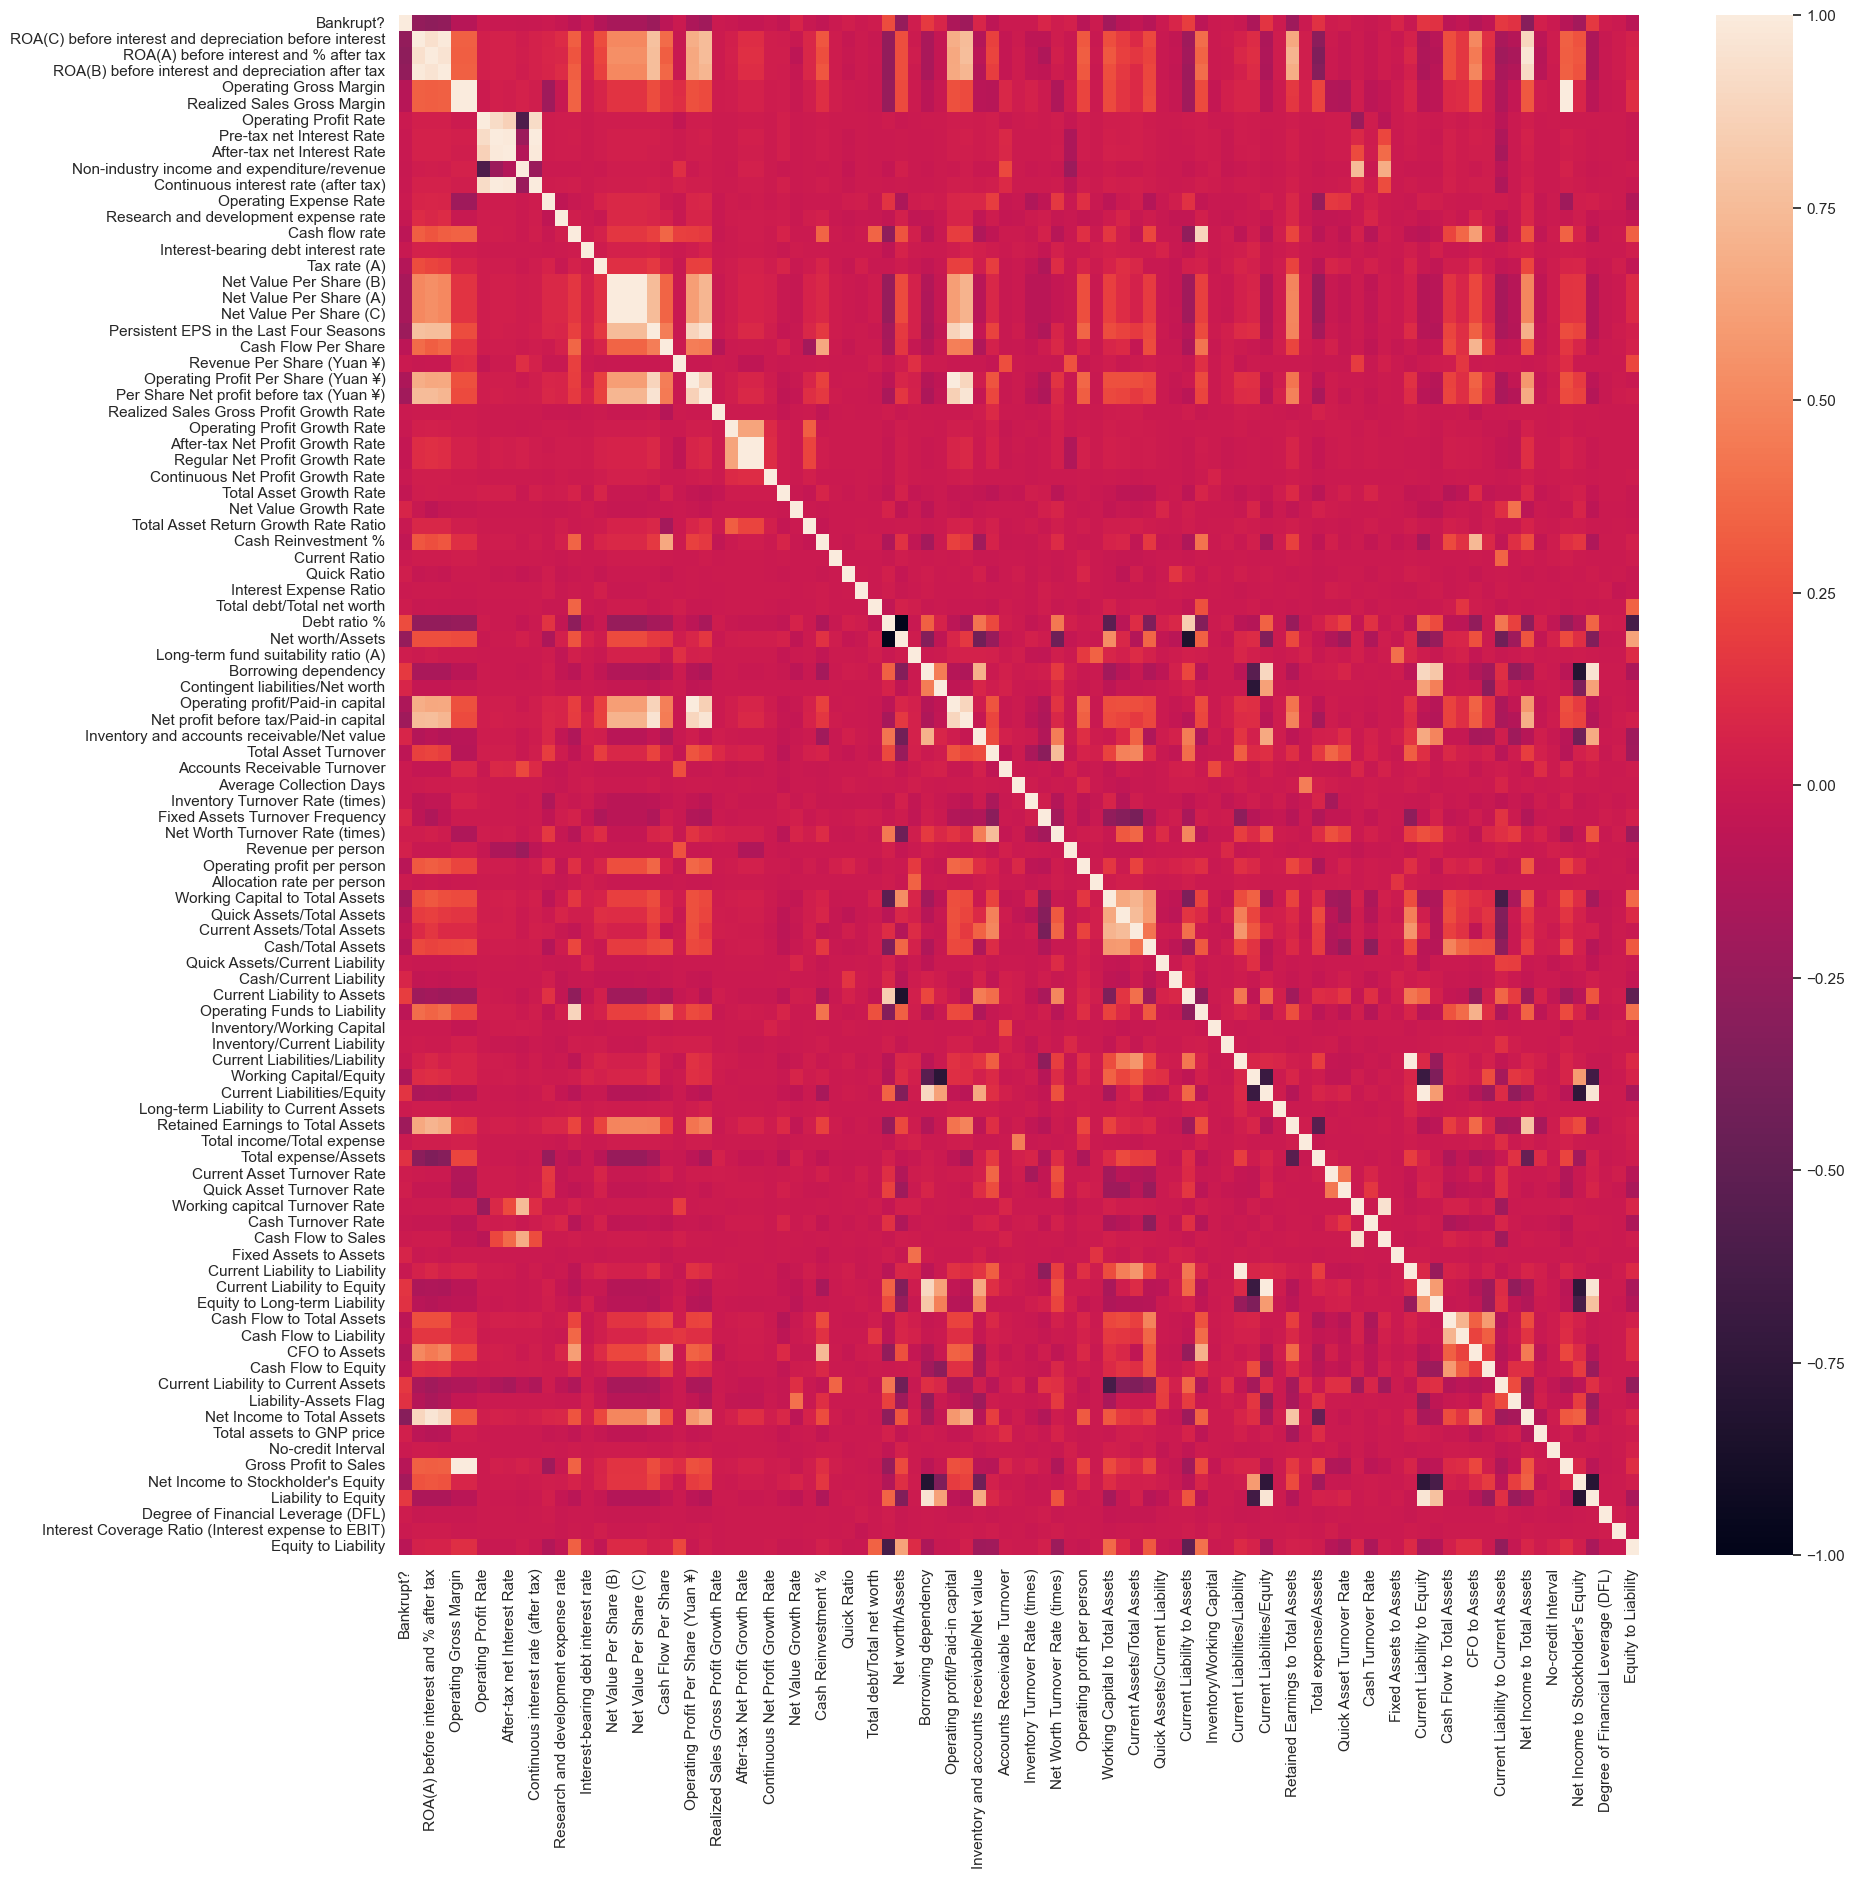

In [13]:
# 94 predictors left.

# Maybe remove highly correlated columns
sns.set(rc={'figure.figsize':(20,20)})

sns.heatmap(data.corr())

# I can clearly see some black/white pixels, these are the pairs we should be focusing on.
# Then remove 1 of the column that made up each of the pairs.
# The heatmap now looks so pixelated.

<AxesSubplot: ylabel='Columns'>

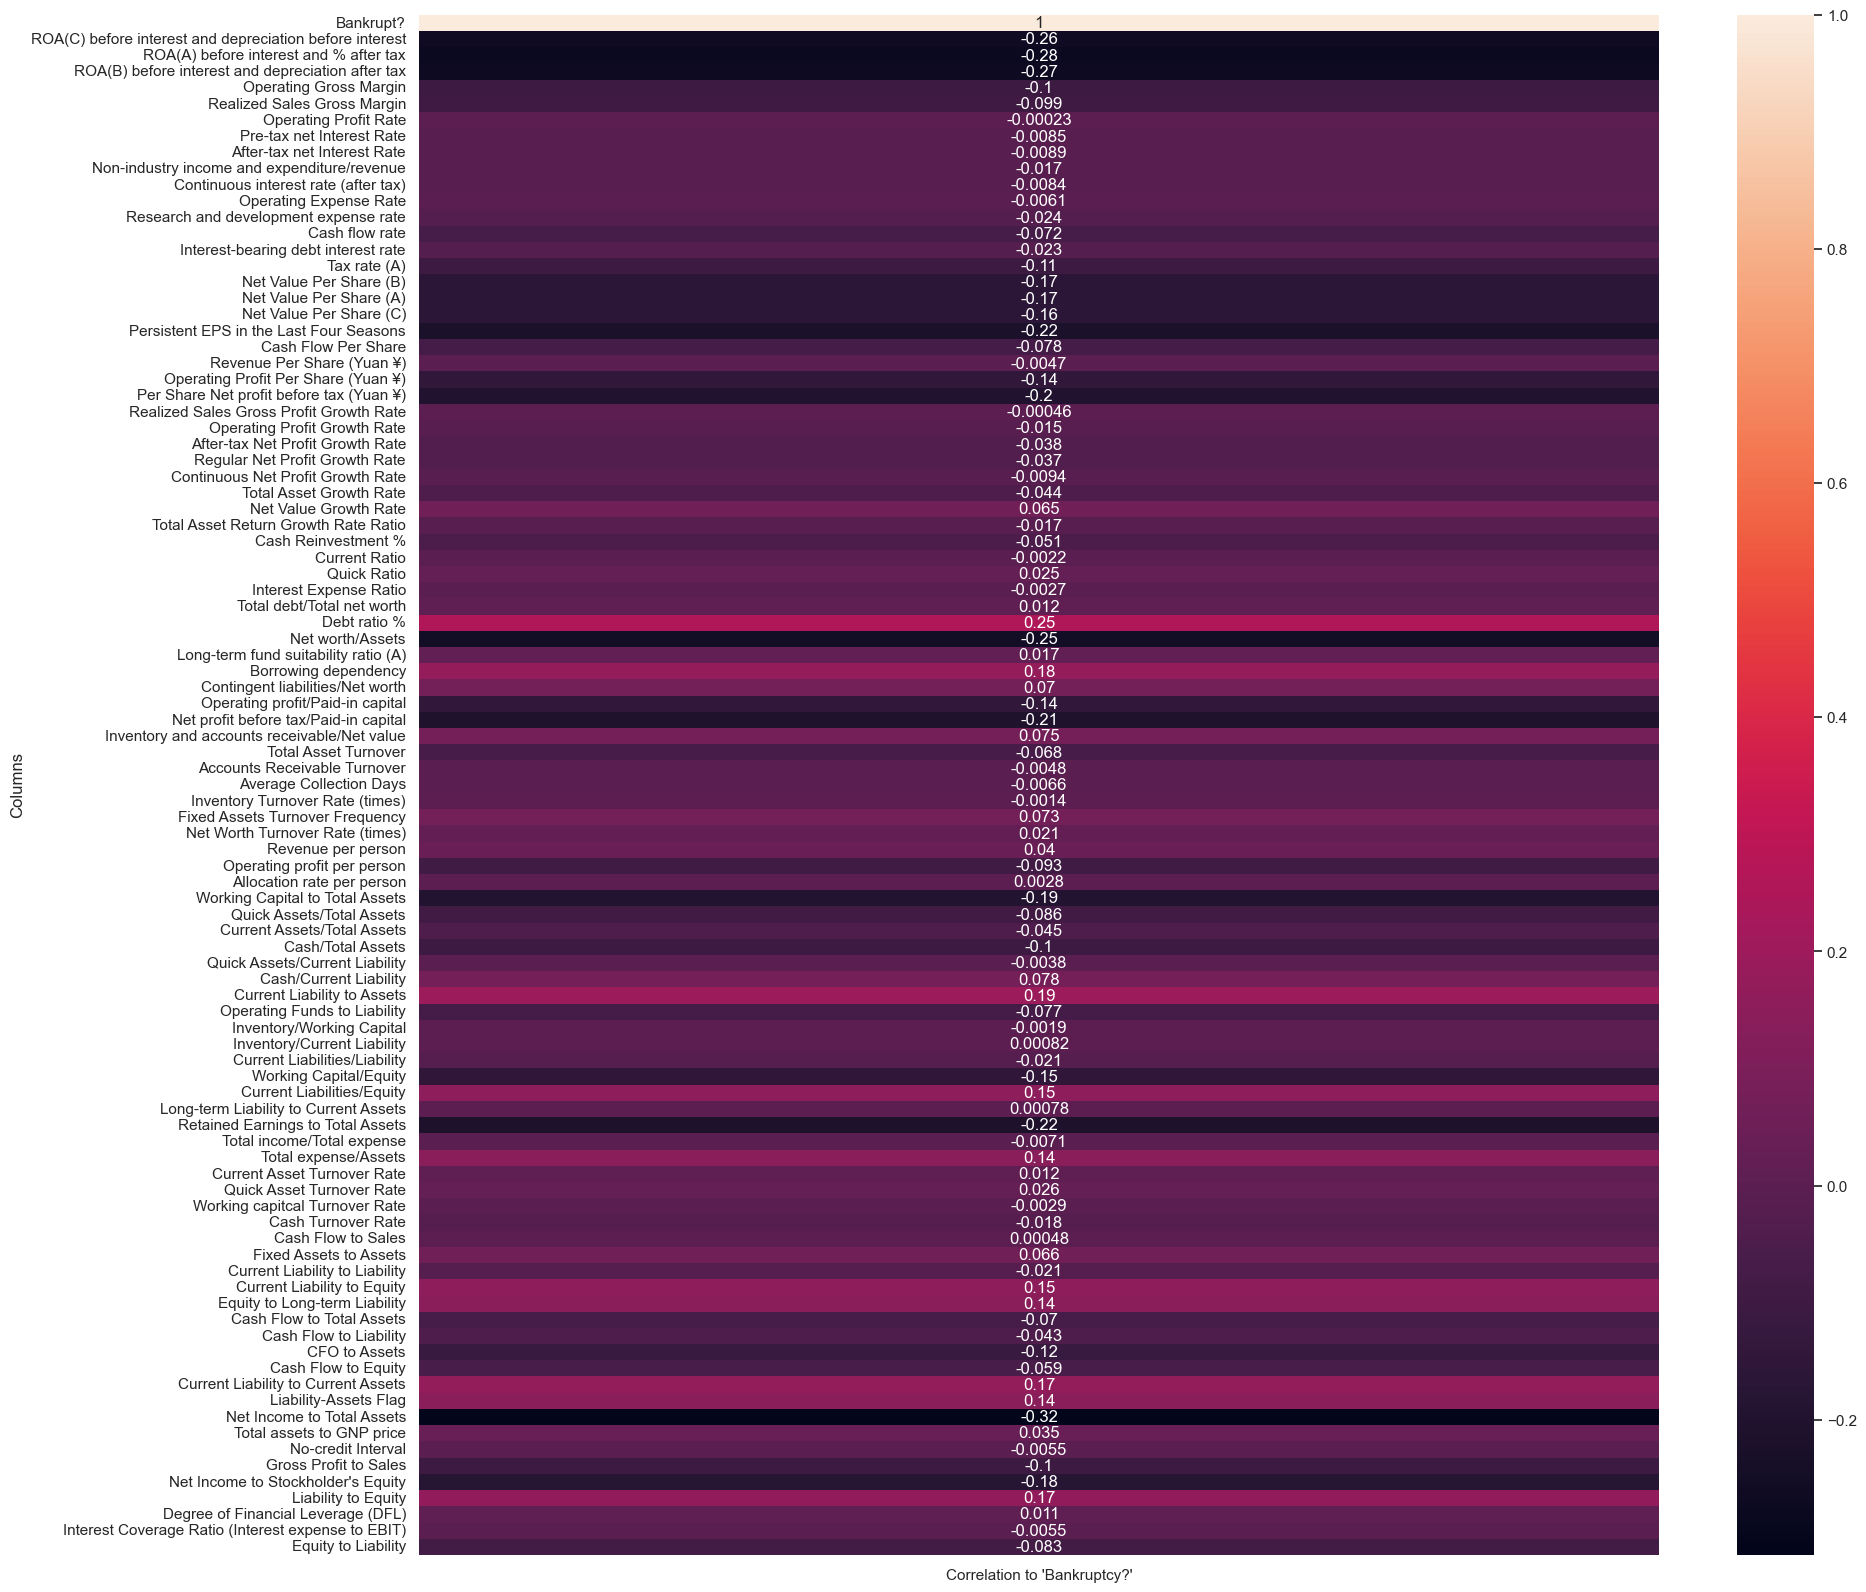

In [14]:
# Plotting Each Predictor's correlation value with the target
bankrupt_corr = pd.DataFrame()
bankrupt_corr['Columns'] = data.corr()['Bankrupt?'].keys()
bankrupt_corr["Correlation to 'Bankruptcy?'"] = data.corr()['Bankrupt?'].values

bankrupt_corr.set_index("Columns", inplace=True)

sns.heatmap(bankrupt_corr, annot=True)

In [15]:
bankrupt_corr.sort_values(by="Correlation to 'Bankruptcy?'", ascending=True).head(5)

,Correlation to 'Bankruptcy?'
Columns,
Net Income to Total Assets,-0.31546
ROA(A) before interest and % after tax,-0.28294
ROA(B) before interest and depreciation after tax,-0.27305
ROA(C) before interest and depreciation before interest,-0.26081
Net worth/Assets,-0.25016


In [16]:
bankrupt_corr.sort_values(by="Correlation to 'Bankruptcy?'", ascending=False).head(6)

,Correlation to 'Bankruptcy?'
Columns,
Bankrupt?,1.00000
Debt ratio %,0.25016
Current Liability to Assets,0.19449
Borrowing dependency,0.17654
Current Liability to Current Assets,0.17131
Liability to Equity,0.16681


In [17]:
# None of the predictors have a high correlation value with the target variable.

### End of EDA
### Performing PCA

In [18]:
# Function to extract highly correlated features, based on provided threshold value.
# Credit: https://www.naukri.com/learning/articles/feature-selection-techniques-python-code/

def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: col_corr.add(corr_matrix.columns[i])
                
    return col_corr

In [19]:
# Eliminating potential predictor pairings with high correlation with one another
# Retrieve column within pairings where they have correlation > 0.85
X = data.drop('Bankrupt?',axis=1)
y = data['Bankrupt?']

corr_pairs = correlation(X, 0.85)

print(len(corr_pairs))
# 22 found
      
print(corr_pairs)

22
{'Operating Funds to Liability', 'Net Income to Total Assets', 'Regular Net Profit Growth Rate', 'Current Liabilities/Equity', 'Liability to Equity', 'Per Share Net profit before tax (Yuan ¥)', 'Current Liability to Equity', 'Net Value Per Share (A)', 'Gross Profit to Sales', 'ROA(A) before interest and % after tax', 'Operating profit/Paid-in capital', 'Net profit before tax/Paid-in capital', 'After-tax net Interest Rate', 'Pre-tax net Interest Rate', 'ROA(B) before interest and depreciation after tax', 'Net worth/Assets', 'Continuous interest rate (after tax)', 'Cash Flow to Sales', 'Net Value Per Share (C)', 'Operating Profit Per Share (Yuan ¥)', 'Current Liability to Liability', 'Realized Sales Gross Margin'}


In [20]:
# Dropping the identified columns with high correlation
X.drop(corr_pairs,axis=1,inplace=True)

# 72  predictors left
X.shape

(6819, 72)

In [21]:
# Perform Top 25 features that best predict the target via Chi-Square Test

X_topK_chi2 = SelectKBest(chi2, k=25).fit(X, y).get_feature_names_out()

# Top 25 features selected
X_topK_chi2

array(['Operating Expense Rate', 'Research and development expense rate',
       'Interest-bearing debt interest rate',
       'Revenue Per Share (Yuan ¥)', 'Total Asset Growth Rate',
       'Net Value Growth Rate', 'Current Ratio', 'Quick Ratio',
       'Total debt/Total net worth', 'Accounts Receivable Turnover',
       'Average Collection Days', 'Inventory Turnover Rate (times)',
       'Fixed Assets Turnover Frequency', 'Revenue per person',
       'Allocation rate per person', 'Quick Assets/Current Liability',
       'Cash/Current Liability', 'Inventory/Current Liability',
       'Long-term Liability to Current Assets',
       'Current Asset Turnover Rate', 'Quick Asset Turnover Rate',
       'Cash Turnover Rate', 'Fixed Assets to Assets',
       'Liability-Assets Flag', 'Total assets to GNP price'], dtype=object)

In [22]:
# Dropping all other predictors other than the 25 found.
X = X[X_topK_chi2]
X

,Operating Expense Rate,Research and development expense rate,Interest-bearing debt interest rate,Revenue Per Share (Yuan ¥),Total Asset Growth Rate,Net Value Growth Rate,Current Ratio,Quick Ratio,Total debt/Total net worth,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Revenue per person,Allocation rate per person,Quick Assets/Current Liability,Cash/Current Liability,Inventory/Current Liability,Long-term Liability to Current Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Liability-Assets Flag,Total assets to GNP price
0,0.00013,0.00000,0.00073,0.01756,4980000000.00000,0.00033,0.00226,0.00121,0.02127,0.00181,0.00349,0.00018,0.00012,0.03416,0.03714,0.00200,0.00015,0.00104,0.02559,701000000.00000,6550000000.00000,458000000.00000,0.42421,0,0.00922
1,0.00029,0.00000,0.00065,0.02114,6110000000.00000,0.00044,0.00602,0.00404,0.01250,0.00129,0.00492,9360000000.00000,719000000.00000,0.00689,0.01233,0.00414,0.00138,0.00521,0.02395,0.00011,7700000000.00000,2490000000.00000,0.46883,0,0.00832
2,0.00024,25500000.00000,0.00079,0.00594,7280000000.00000,0.00040,0.01154,0.00535,0.02125,0.00150,0.00423,65000000.00000,2650000000.00000,0.02900,0.14102,0.00630,5340000000.00000,0.01388,0.00372,0.00179,0.00102,761000000.00000,0.27618,0,0.04000
3,0.00011,0.00000,0.00045,0.01437,4880000000.00000,0.00038,0.00419,0.00290,0.00957,0.00197,0.00321,7130000000.00000,9150000000.00000,0.01546,0.02132,0.00296,0.00101,0.00354,0.02217,8140000000.00000,6050000000.00000,2030000000.00000,0.55914,0,0.00325
4,7890000000.00000,0.00000,0.00069,0.02969,5510000000.00000,0.00044,0.00602,0.00373,0.00515,0.00145,0.00437,0.00016,0.00029,0.05811,0.02399,0.00427,0.00068,0.00487,0.00000,6680000000.00000,5050000000.00000,824000000.00000,0.30955,0,0.00388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.00015,4500000000.00000,0.00018,0.02077,7070000000.00000,0.00045,0.01045,0.00546,0.00666,0.00069,0.00918,40300000.00000,0.00014,0.00635,0.00631,0.00547,0.00507,0.01321,0.00179,0.00023,0.00012,0.00011,0.40034,0,0.00047
6815,5220000000.00000,1440000000.00000,0.00024,0.02305,5220000000.00000,0.00045,0.00926,0.00674,0.00462,0.00066,0.00965,9940000000.00000,0.00061,0.01608,0.00340,0.00679,0.00473,0.00673,0.00220,0.00015,0.00012,7710000000.00000,0.09614,0,0.00196
6816,0.00025,0.00010,0.00000,0.04425,5990000000.00000,0.00044,0.03842,0.03511,0.00139,0.00151,0.00419,0.00028,0.00102,0.02210,0.00277,0.03553,0.08821,0.00781,0.00000,0.00018,0.00017,0.00041,0.05551,0,0.00284
6817,0.00012,2510000000.00000,0.00021,0.03154,7250000000.00000,0.00053,0.01278,0.00726,0.00382,0.00072,0.00883,4550000000.00000,0.00023,0.01275,0.00749,0.00775,0.00713,0.01333,3200000000.00000,0.00021,0.00014,0.00012,0.24680,0,0.00284


In [23]:
# Perform Train_Test_Split

# start with 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       1.00      0.14      0.24        51

    accuracy                           0.97      1364
   macro avg       0.98      0.57      0.61      1364
weighted avg       0.97      0.97      0.96      1364



<AxesSubplot: >

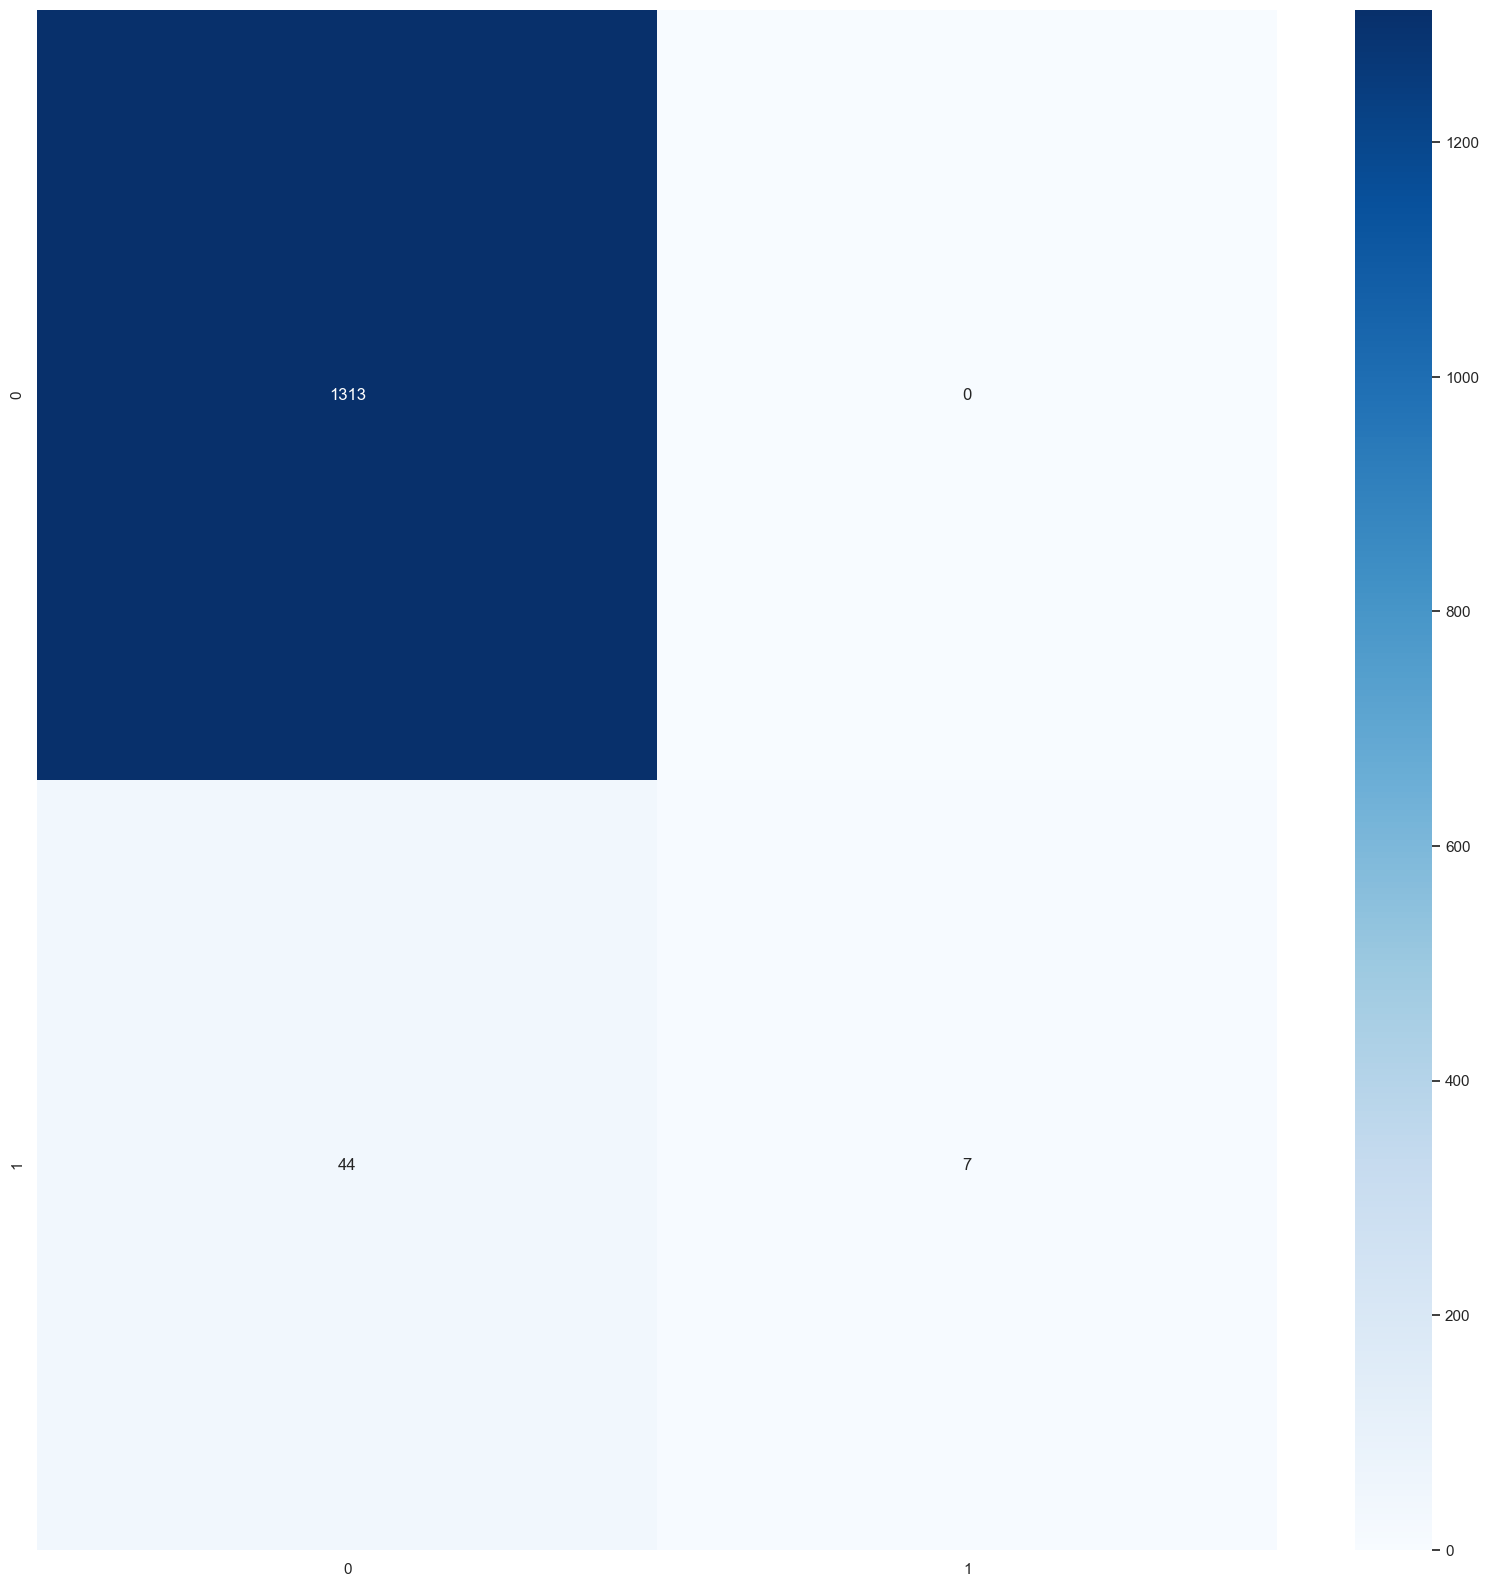

In [24]:
# Base RF Model on original training set
rfc_base = RandomForestClassifier()
rfc_base.fit(X_train,y_train)

y_pred = rfc_base.predict(X_test)

report = classification_report(y_test,y_pred)
print("-"*100)
print(report)

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d",cmap = "Blues")

In [25]:
# Perform Over-Sampling on testing data
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Balanced dataset for training data
y_resampled.value_counts()

0    5286
1    5286
Name: Bankrupt?, dtype: int64

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.61      0.22      0.32        51

    accuracy                           0.97      1364
   macro avg       0.79      0.61      0.65      1364
weighted avg       0.96      0.97      0.96      1364



<AxesSubplot: >

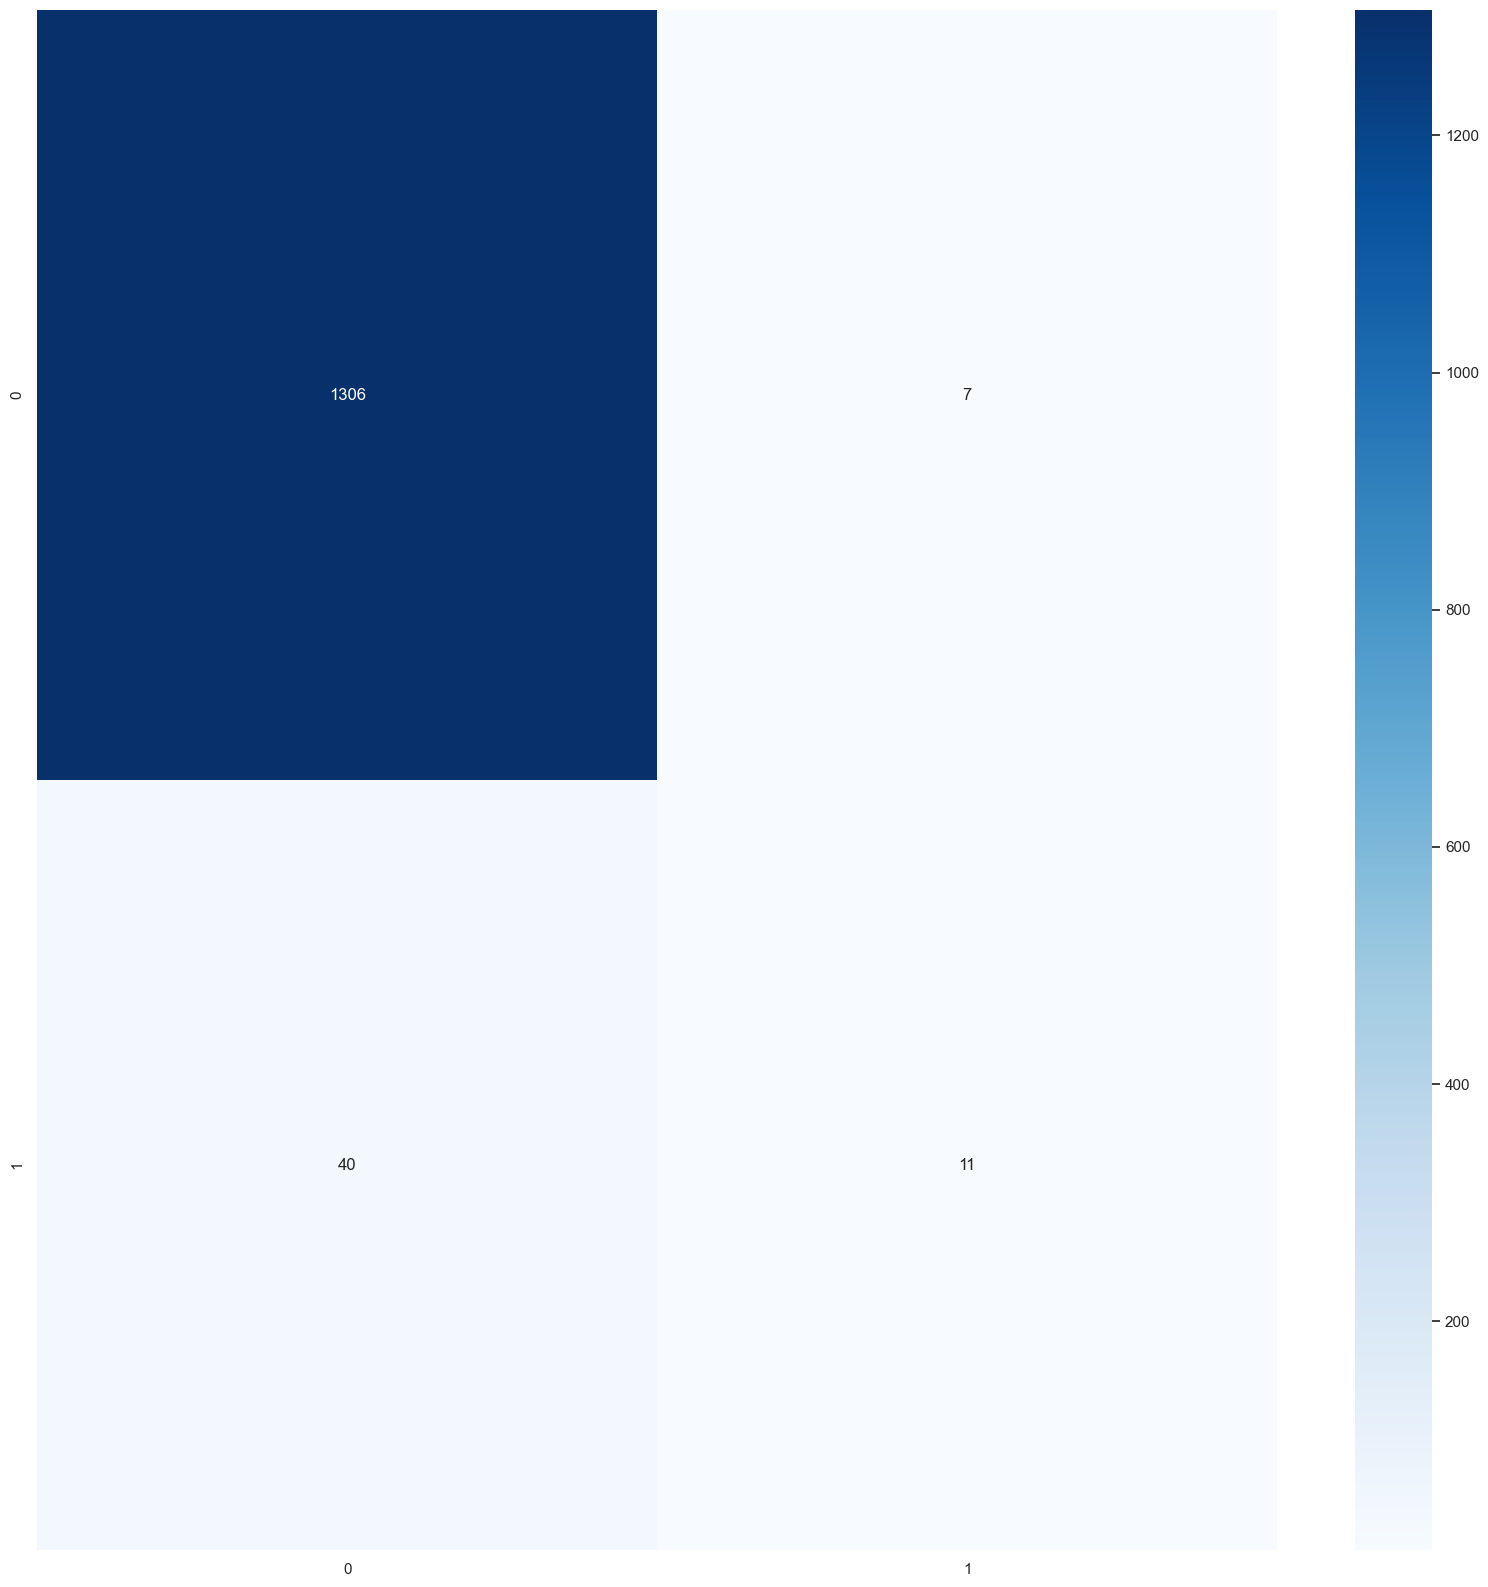

In [26]:
# Base RF Model on resampled testing data
rfc_resamp = RandomForestClassifier()
rfc_resamp.fit(X_resampled,y_resampled)

y_pred = rfc_resamp.predict(X_test)

report = classification_report(y_test,y_pred)
print("-"*100)
print(report)

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d",cmap = "Blues")

# Precision of Bankruptcy predictions decreased. 
# False Positives are being predicted now where in the base model it did not occur.

# This could be due to the Oversampling:
# - providing additional noise to the model.
# - create more training data, causing overfitting.
# Resulting the model to underperform against the test data

In [27]:
# Using GridSearchCV to perform hyperparameter tuning on a bunch of parameters
# But it takes quite some time to run
# Current on 24 combinations
rfc_search = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=3, min_samples_leaf=3)

param_grid = { 
    'n_estimators': [100,200],
    'max_depth' : [10,20,30],
    'min_samples_split': [2,3],
    'min_samples_leaf': [2,3]
}

CV_rfc = GridSearchCV(estimator=rfc_search, param_grid=param_grid, scoring='f1', cv=5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'max_depth': 30,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.90      0.18      0.30        51

    accuracy                           0.97      1364
   macro avg       0.93      0.59      0.64      1364
weighted avg       0.97      0.97      0.96      1364



<AxesSubplot: >

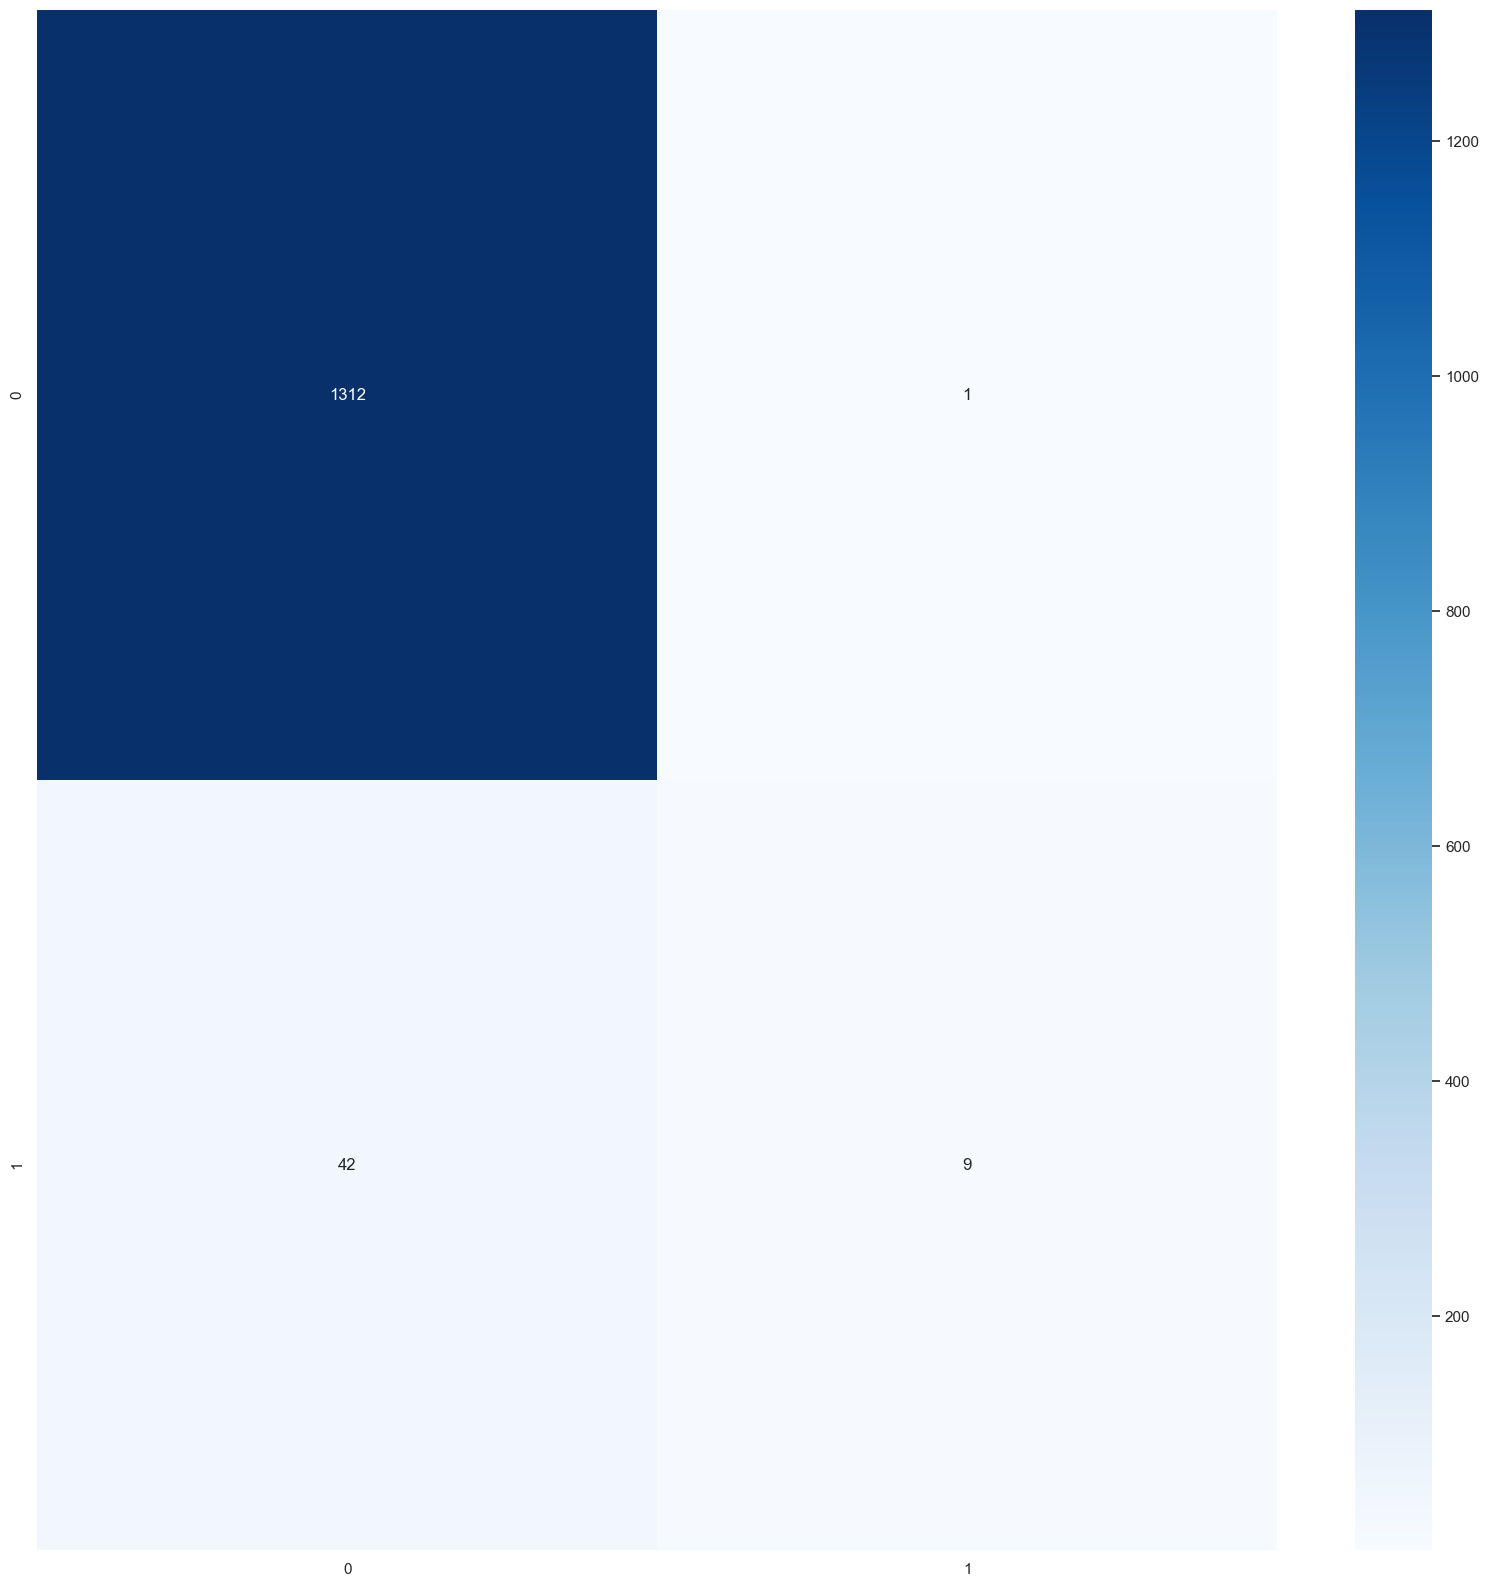

In [45]:
# Using the found paramters on the modified RF model
rfc_search1 = RandomForestClassifier(n_estimators=100, max_depth=30, min_samples_split=2, min_samples_leaf=2)
rfc_search1.fit(X_train,y_train)

y_pred = rfc_search1.predict(X_test)

report = classification_report(y_test,y_pred)
print("-"*100)
print(report)

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d",cmap = "Blues")

In [29]:
### Trying to tune each parameter on its own instead 

In [30]:
# Using GridSearchCV to perform hyperparameter tuning, one parameter at a time
# Number of trees
param_grid = { 
    'n_estimators': [100,200,300,400,500]
}

CV_rfc = GridSearchCV(estimator=rfc_search, param_grid=param_grid, scoring='f1', cv=5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'n_estimators': 300}

In [31]:
# Using GridSearchCV to perform hyperparameter tuning, one parameter at a time
# Max tree depth
param_grid = { 
    'max_depth' : [5,10,15,20,25,30]
}

CV_rfc = GridSearchCV(estimator=rfc_search, param_grid=param_grid, scoring='f1', cv=5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'max_depth': 15}

In [32]:
# Using GridSearchCV to perform hyperparameter tuning, one parameter at a time
# Mininum number of samples for a node to split
param_grid = { 
    'min_samples_split': [2,3,4,5,6,7]
}

CV_rfc = GridSearchCV(estimator=rfc_search, param_grid=param_grid, scoring='f1', cv=5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'min_samples_split': 6}

In [33]:
# Using GridSearchCV to perform hyperparameter tuning, one parameter at a time
# Minimum number of samples to be considered a leaf
param_grid = { 
    'min_samples_leaf': [2,3,4,5,6,7]
}

CV_rfc = GridSearchCV(estimator=rfc_search, param_grid=param_grid, scoring='f1', cv=5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'min_samples_leaf': 3}

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       1.00      0.14      0.24        51

    accuracy                           0.97      1364
   macro avg       0.98      0.57      0.61      1364
weighted avg       0.97      0.97      0.96      1364



<AxesSubplot: >

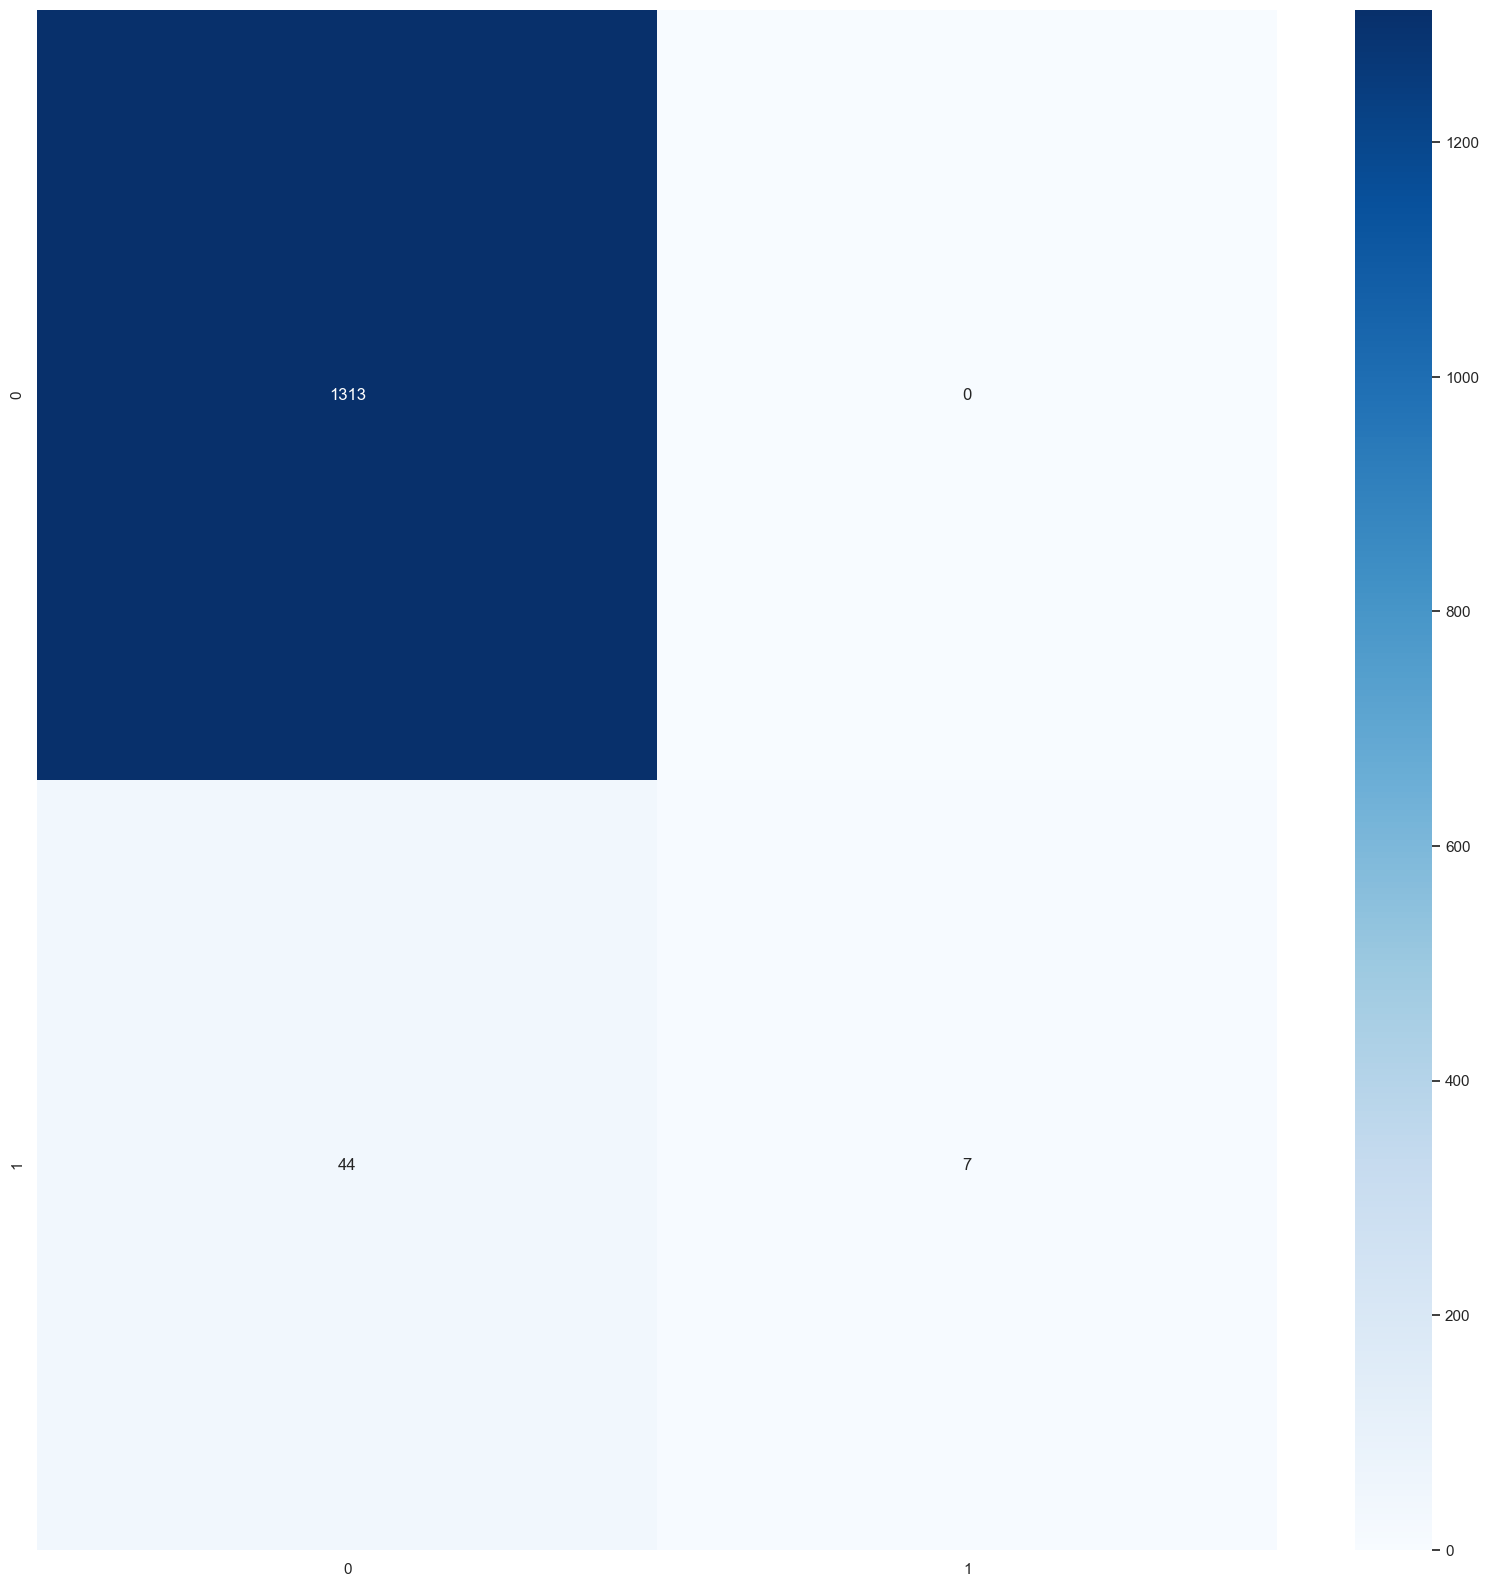

In [46]:
# Using the newly found paramters on the modified RF model
rfc_search2 = RandomForestClassifier(n_estimators=300, max_depth=15, min_samples_split=6, min_samples_leaf=3)
rfc_search2.fit(X_train,y_train)

y_pred = rfc_search2.predict(X_test)

report = classification_report(y_test,y_pred)
print("-"*100)
print(report)

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d",cmap = "Blues")

In [35]:
# Retrieving feature importances of the best predictor
# Which predictors are the most important in predicting company bankruptcy?
feat_importances = pd.Series(rfc_base.feature_importances_, index=X_train.columns)

feat_importances.sort_values(ascending=False)

Net Value Growth Rate                   0.13694
Total debt/Total net worth              0.08281
Cash/Current Liability                  0.05616
Quick Ratio                             0.05228
Current Ratio                           0.04989
Interest-bearing debt interest rate     0.04383
Quick Assets/Current Liability          0.04127
Allocation rate per person              0.03948
Accounts Receivable Turnover            0.03698
Total assets to GNP price               0.03588
Average Collection Days                 0.03566
Fixed Assets Turnover Frequency         0.03542
Operating Expense Rate                  0.03402
Revenue per person                      0.03228
Revenue Per Share (Yuan ¥)              0.03223
Fixed Assets to Assets                  0.03053
Inventory/Current Liability             0.03050
Total Asset Growth Rate                 0.03003
Cash Turnover Rate                      0.02910
Inventory Turnover Rate (times)         0.02874
Current Asset Turnover Rate             

In [36]:
feat_importances.sort_values(ascending=False).head(5)
# For company performance, we can see here:
# Net Value Growth, Debt ratio and cash/debt ratio
# are highly important finanical health indicators for a corporation

Net Value Growth Rate        0.13694
Total debt/Total net worth   0.08281
Cash/Current Liability       0.05616
Quick Ratio                  0.05228
Current Ratio                0.04989
dtype: float64

In [37]:
feat_importances.sort_values(ascending=False).tail(5)
# While indicators like Liability-Assets Flag, Liability/Asset Ratio, 
# Inventory/Liability Ratio, R&D expense rate
# are not important indicators for corporate financial health

Current Asset Turnover Rate             0.02858
Quick Asset Turnover Rate               0.02832
Research and development expense rate   0.02536
Long-term Liability to Current Assets   0.02256
Liability-Assets Flag                   0.00115
dtype: float64

In [38]:
### End of Modelling via RandomForest
### Trying other models, such as KNN and Neural Networks

In [39]:
# Performing Standardising. Which might help KNN and Neural Networks to perform better prediction.
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1313
           1       0.18      0.14      0.16        51

    accuracy                           0.95      1364
   macro avg       0.58      0.56      0.56      1364
weighted avg       0.94      0.95      0.94      1364



/Users/tanyongjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<AxesSubplot: >

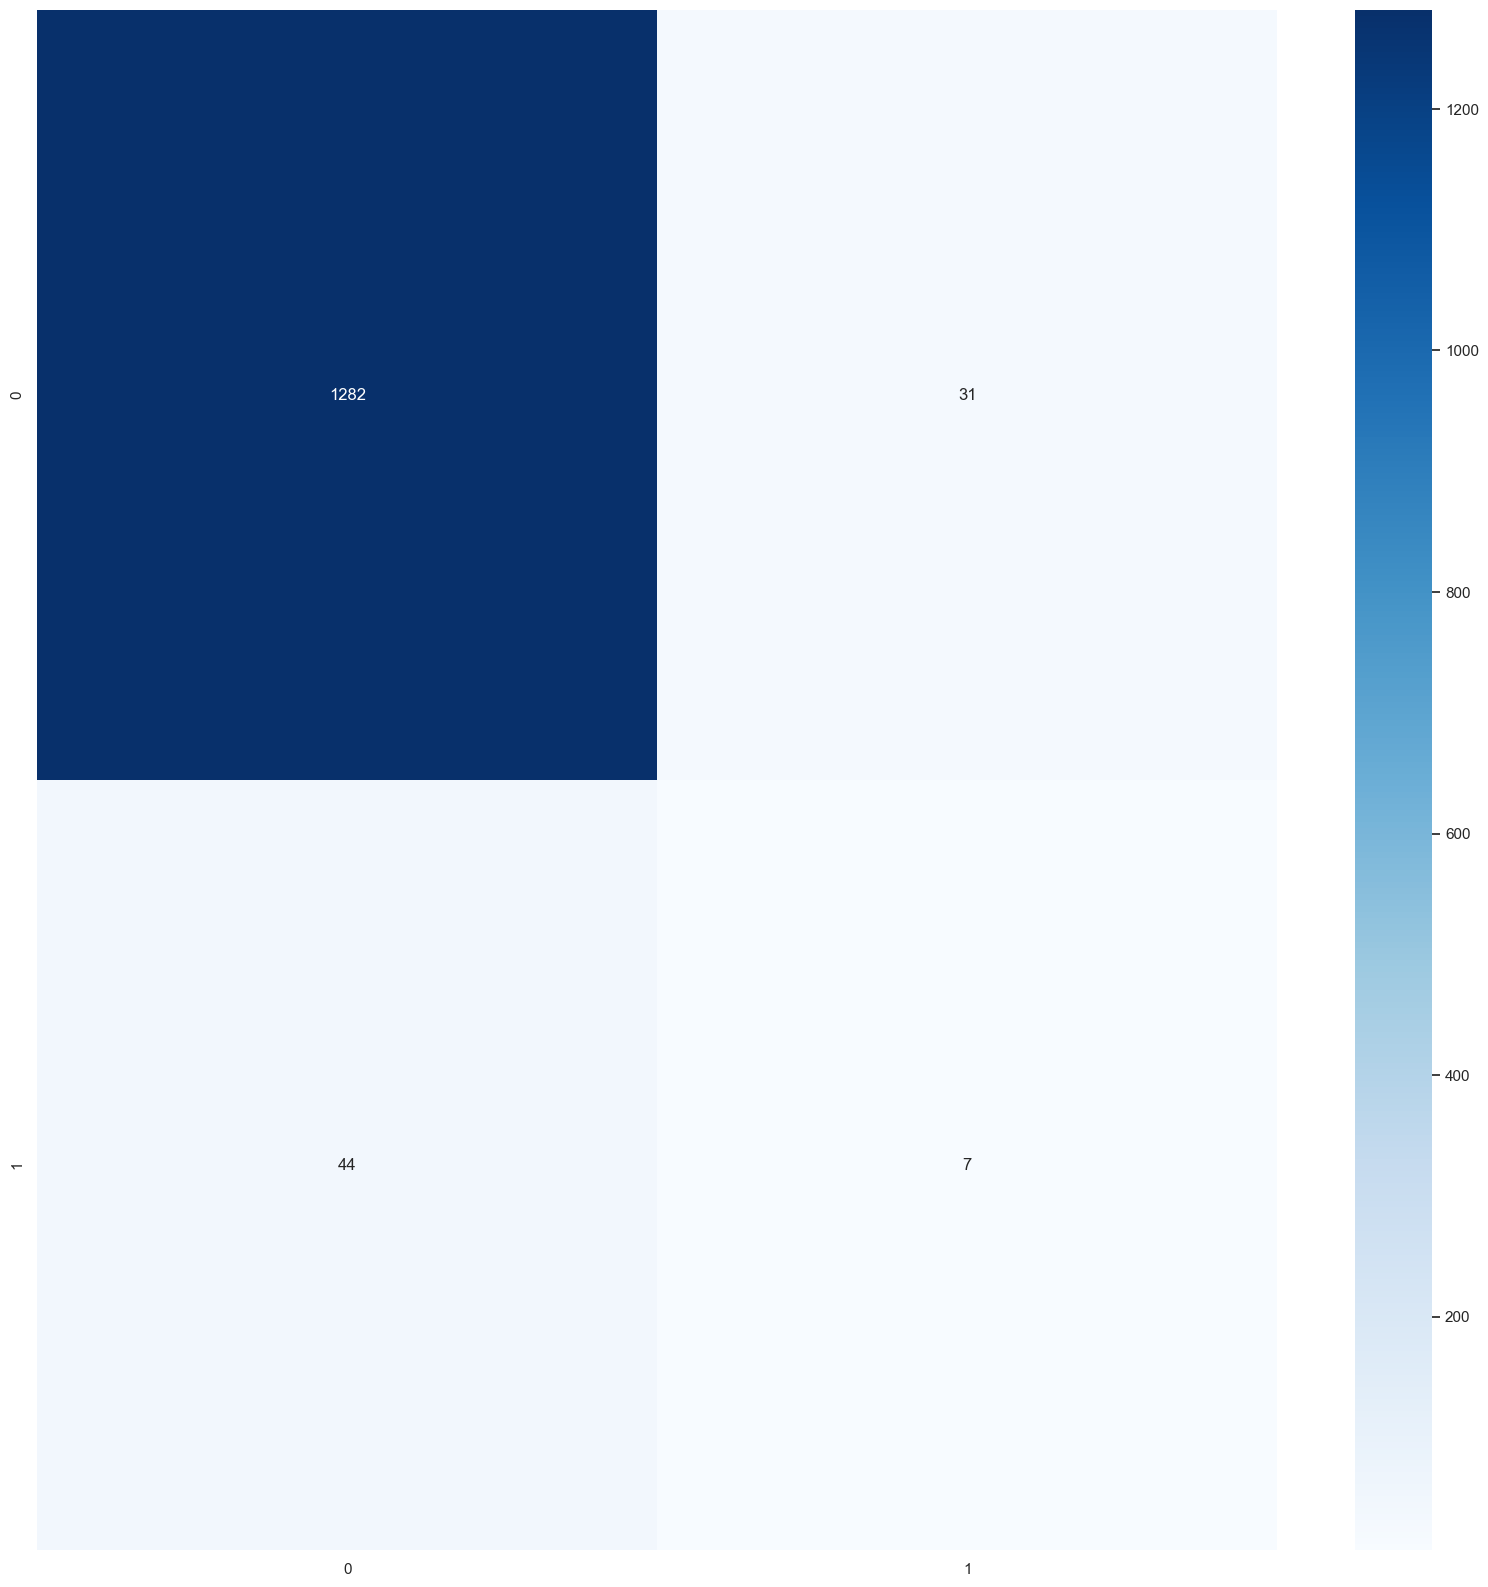

In [40]:
#### Trying KNN, neighbours = 1
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)

knn_predict = neigh.predict(X_test)

# retrieve testing accuracy
report = classification_report(y_test,knn_predict)
print("-"*100)
print(report)

cm = confusion_matrix(y_test,knn_predict)
sns.heatmap(cm,annot=True,fmt="d",cmap = "Blues")

# Low precision and recall on bankrupt corporations

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       0.00      0.00      0.00        51

    accuracy                           0.96      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.96      0.94      1364



/Users/tanyongjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<AxesSubplot: >

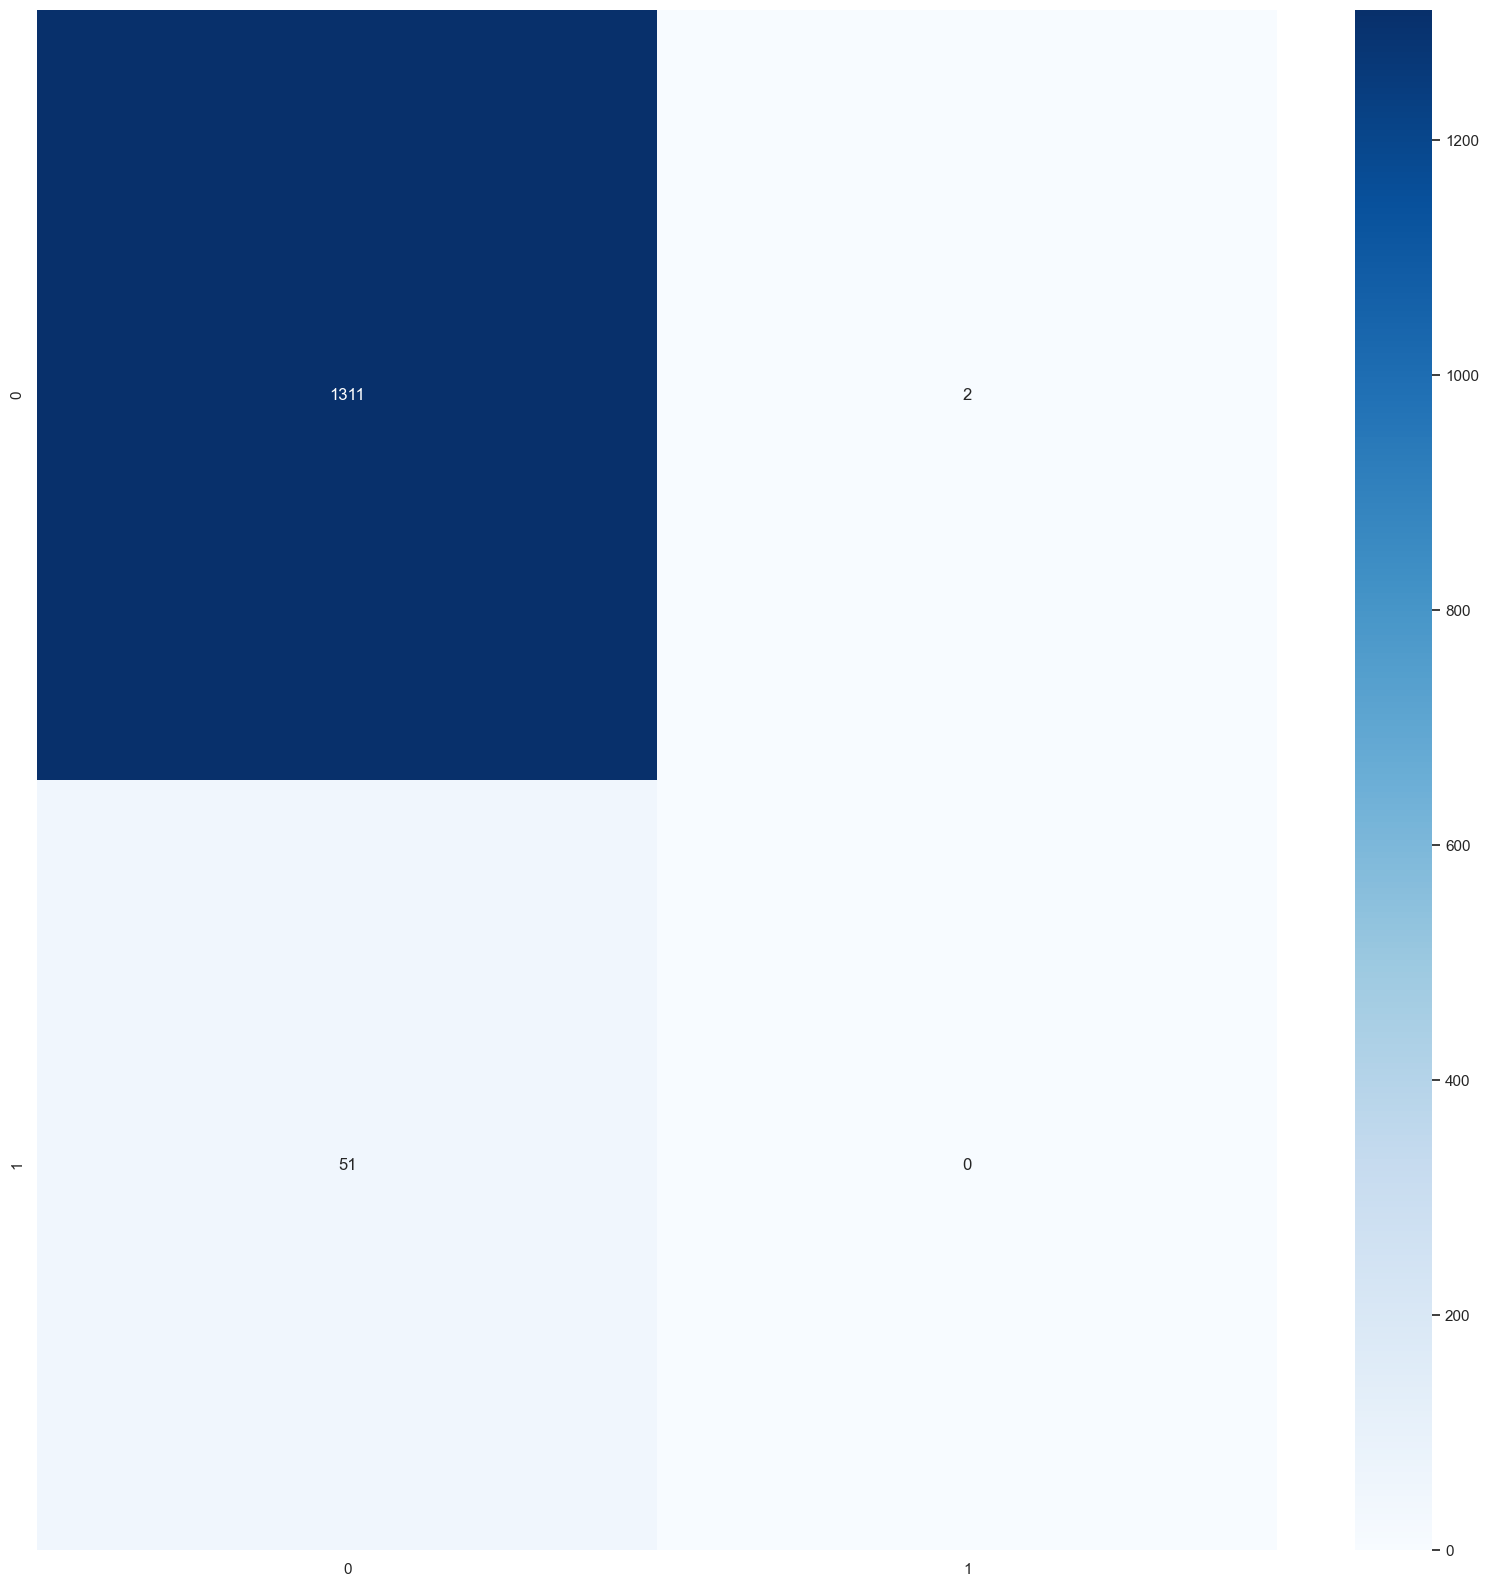

In [41]:
#### Trying KNN, neighbours=2
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, y_train)

knn_predict = neigh.predict(X_test)

# retrieve testing accuracy
report = classification_report(y_test,knn_predict)
print("-"*100)
print(report)

cm = confusion_matrix(y_test,knn_predict)
sns.heatmap(cm,annot=True,fmt="d",cmap = "Blues")

# When number of neighbours goes to 2, it can't predict bankrupt cases.
# I suspect this is due to the imbalance nature of the dataset. Majority of the neighbours are non-bankrupts.

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1313
           1       0.13      0.10      0.11        51

    accuracy                           0.94      1364
   macro avg       0.55      0.54      0.54      1364
weighted avg       0.93      0.94      0.94      1364



/Users/tanyongjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<AxesSubplot: >

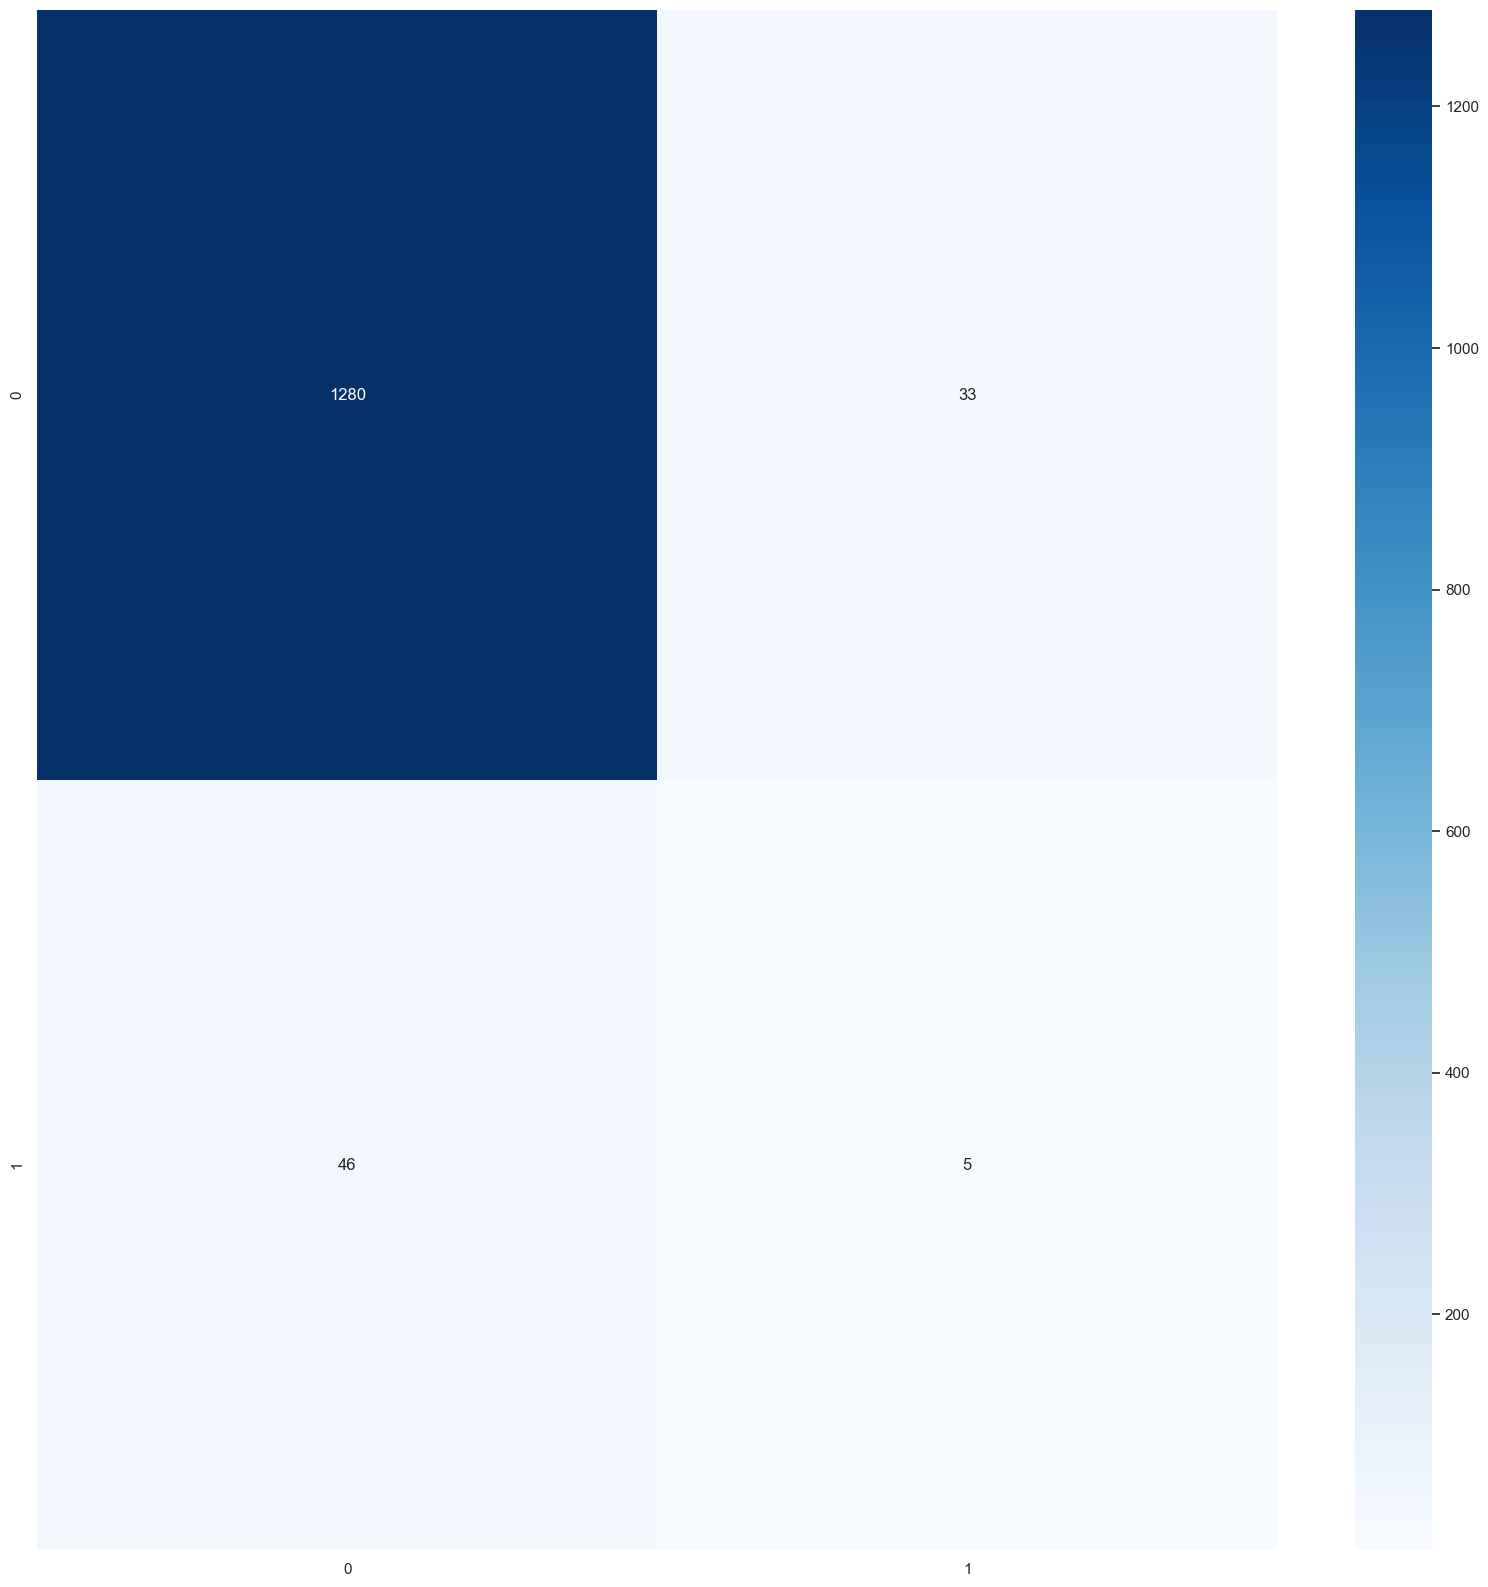

In [42]:
## Trying KNN on standard scaled data
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train_std, y_train)

knn_predict = neigh.predict(X_test_std)

# retrieve testing accuracy
report = classification_report(y_test,knn_predict)
print("-"*100)
print(report)

cm = confusion_matrix(y_test,knn_predict)
sns.heatmap(cm,annot=True,fmt="d",cmap = "Blues")

# Low precision and recall on bankrupt corporations

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1313
           1       0.14      0.41      0.21        51

    accuracy                           0.88      1364
   macro avg       0.56      0.66      0.57      1364
weighted avg       0.94      0.88      0.91      1364



<AxesSubplot: >

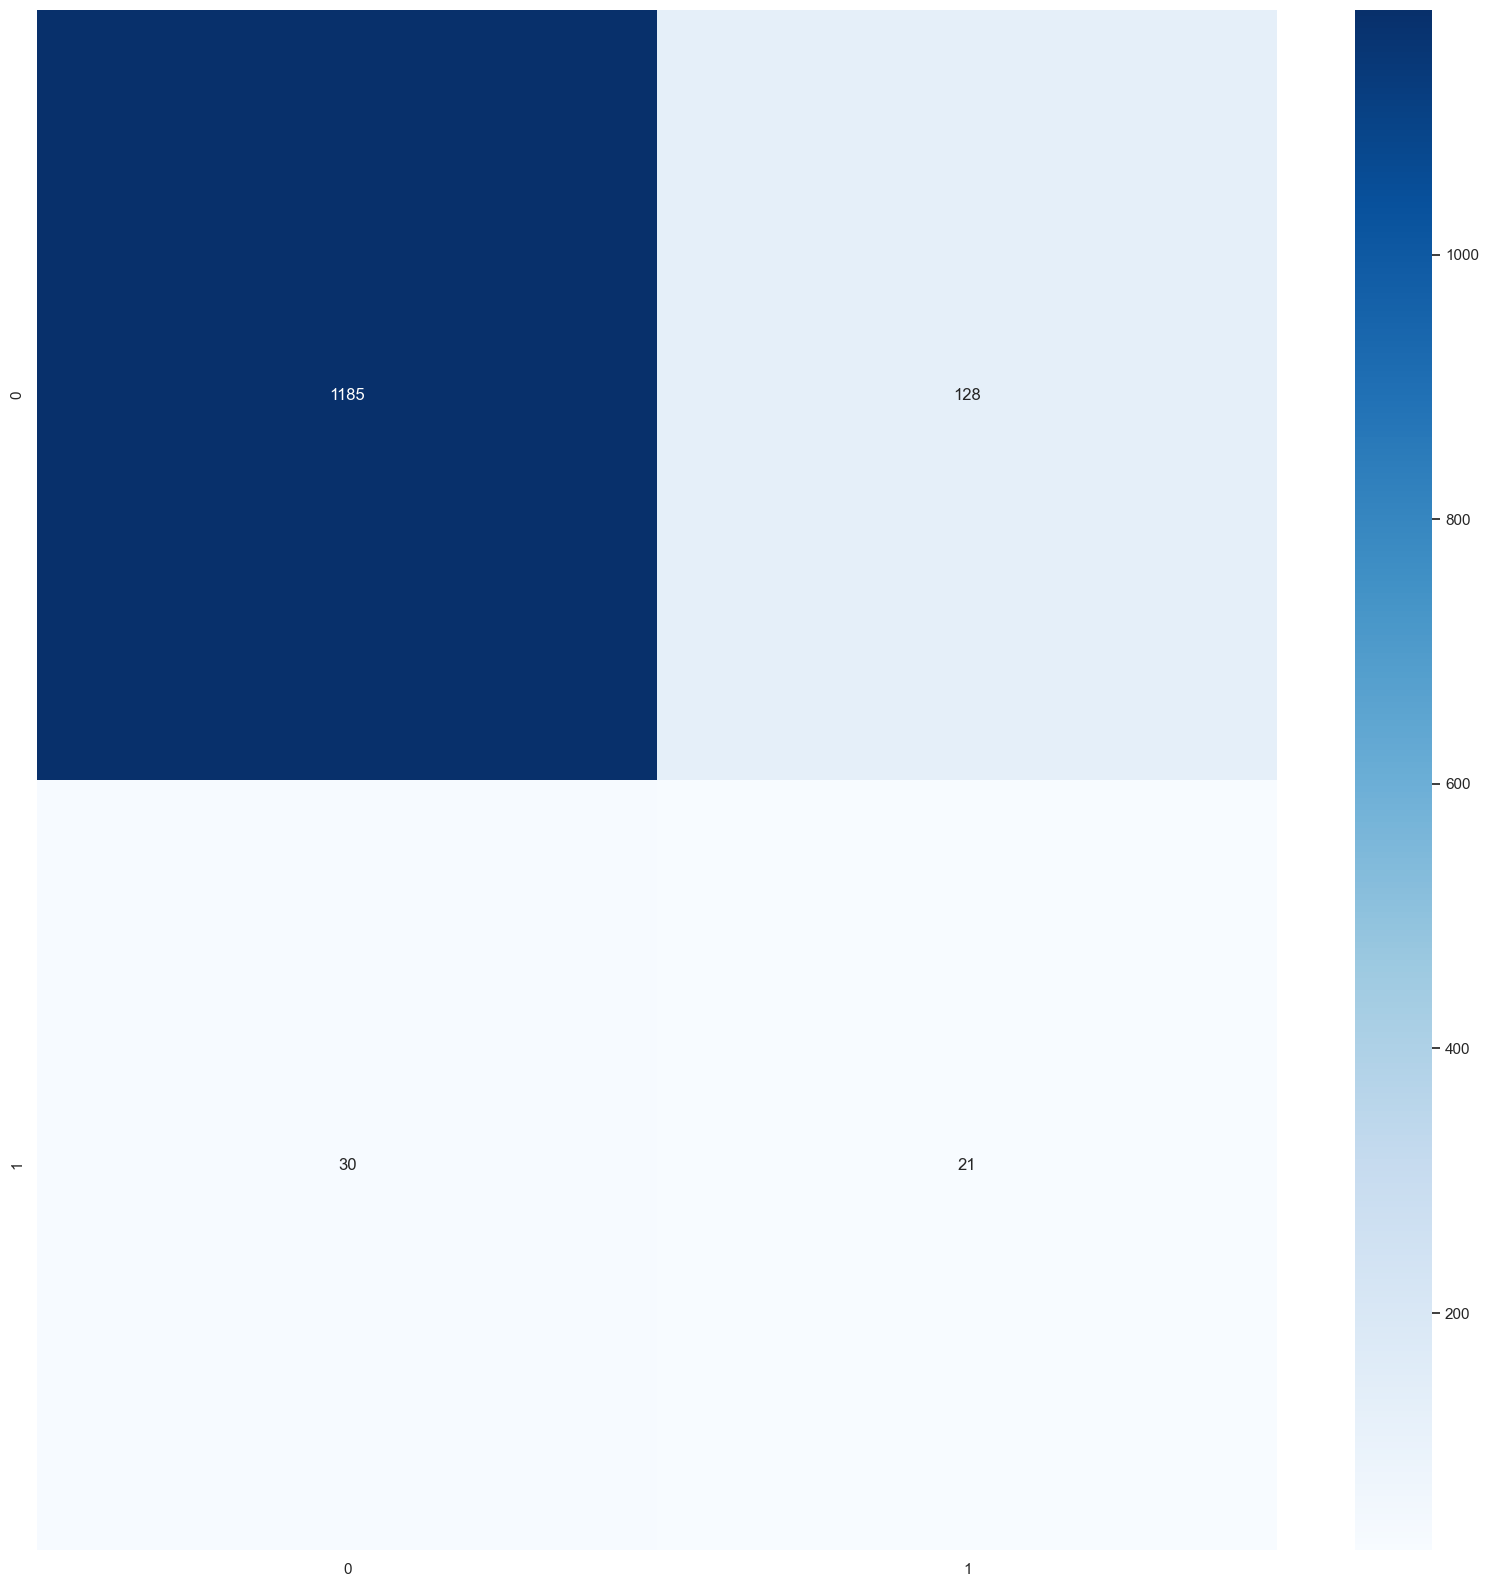

In [43]:
# Trying KNN on oversampled data

neigh = KNeighborsClassifier(n_neighbors=10, weights='distance')
neigh.fit(X_resampled, y_resampled)

knn_predict = neigh.predict(X_test)

# retrieve testing accuracy
report = classification_report(y_test,knn_predict)
print("-"*100)
print(report)

cm = confusion_matrix(y_test,knn_predict)
sns.heatmap(cm,annot=True,fmt="d",cmap = "Blues")

# Improved recall but suffers from low precision

KNN suffers from low precision due to the imbalance nature of the dataset.
The more neighbours used, the result will then be more skewed towards the majority class.

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1313
           1       0.11      0.14      0.12        51

    accuracy                           0.93      1364
   macro avg       0.54      0.55      0.54      1364
weighted avg       0.93      0.93      0.93      1364



<AxesSubplot: >

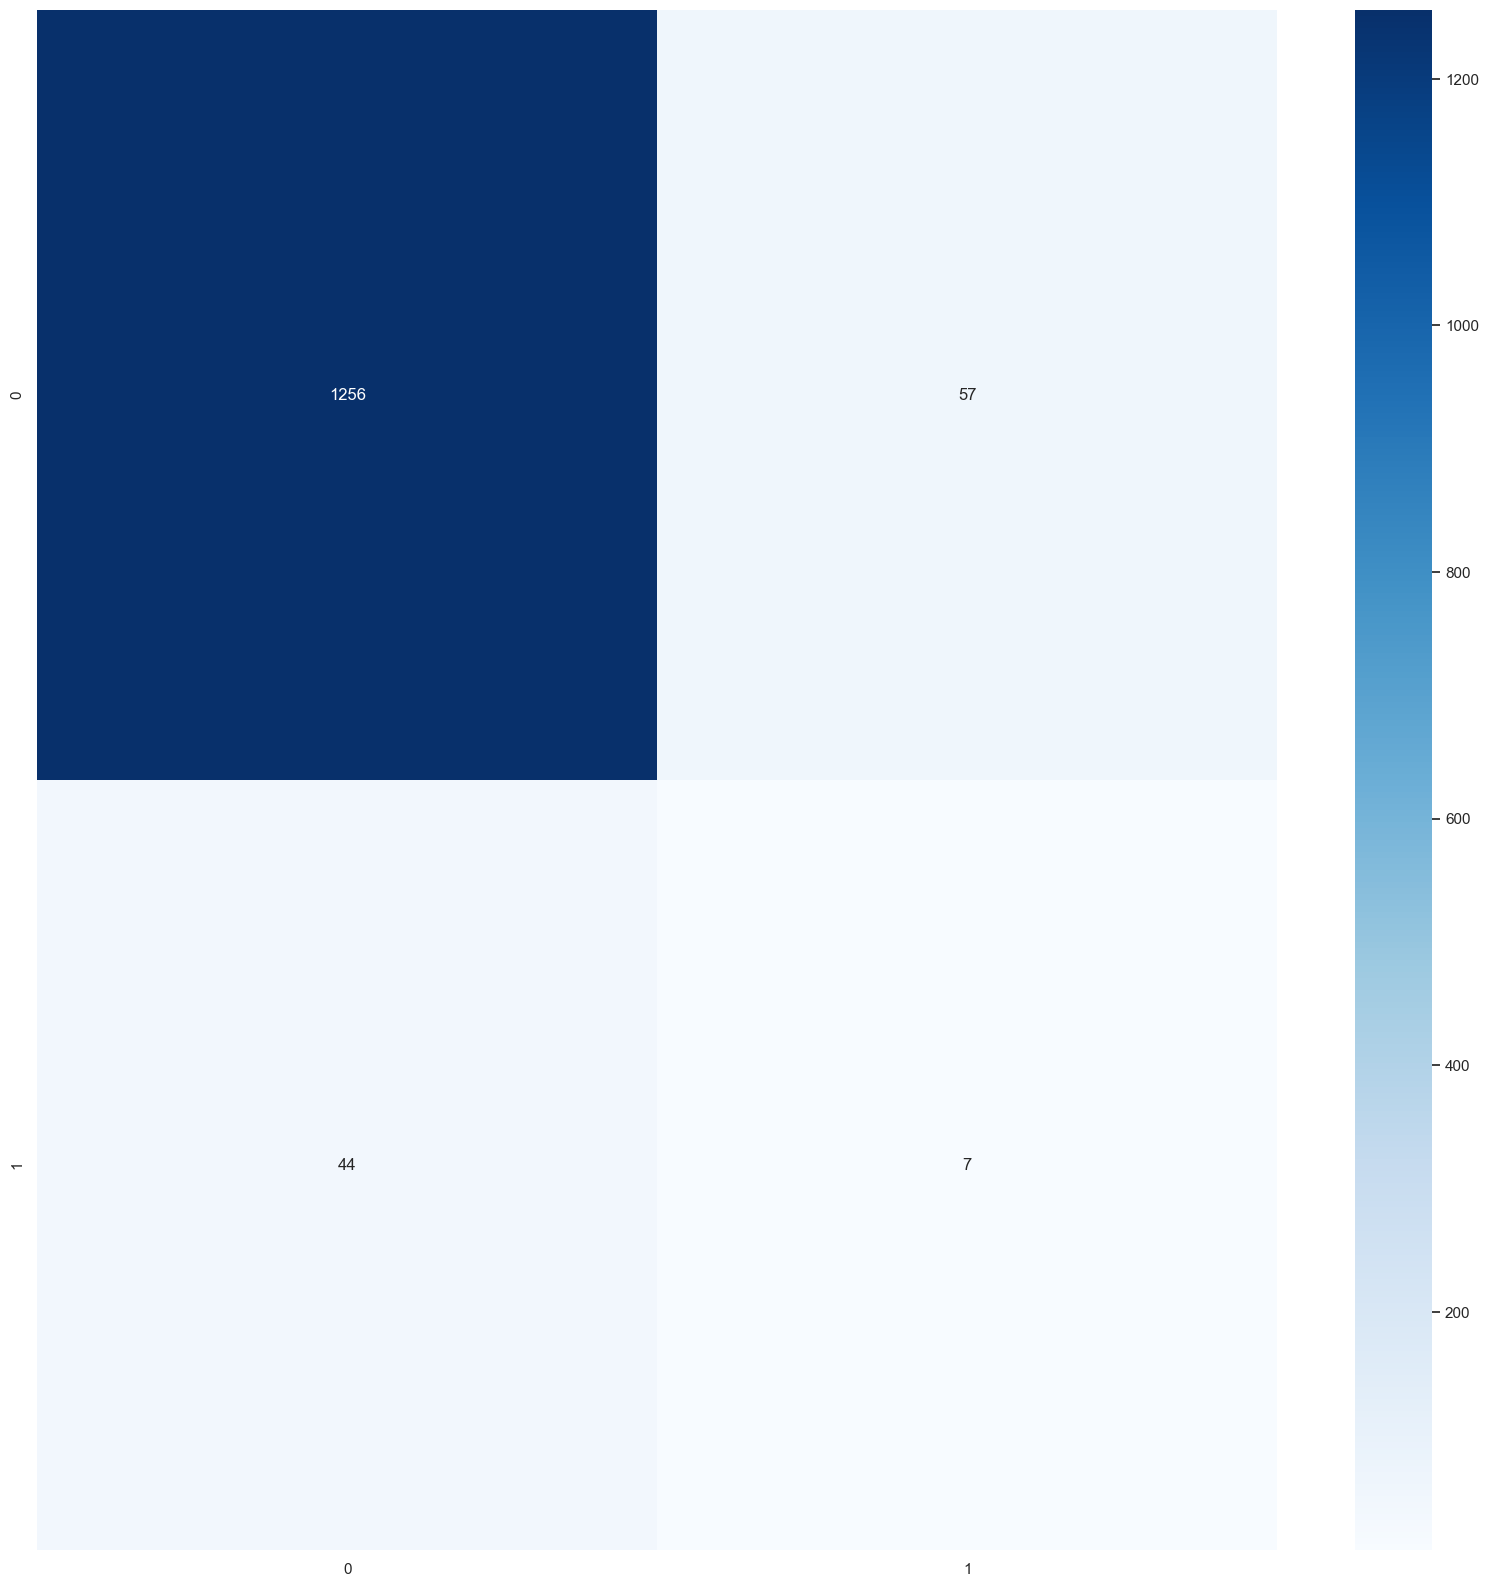

In [44]:
# Trying neural networks with standardised data. 
# Normal data will cause it not to converge within 1300 iterations.
clf = MLPClassifier(solver='lbfgs', max_iter=500)

clf.fit(X_train_std, y_train)

clf_predict = clf.predict(X_test_std)

# retrieve testing accuracy
report = classification_report(y_test,clf_predict)
print("-"*100)
print(report)

cm = confusion_matrix(y_test,clf_predict)
sns.heatmap(cm,annot=True,fmt="d",cmap = "Blues")

# Low f1 score

Summary: RandomForest is still the best model (out of the 3 models ran) for identifying non-performing companies.
Although the f1 score for the minority class might be low, but it has good precision.
A low recall value might not necessarily be deterimental. 
As within non-bankrupt companies, there exist companies that are in bad financial health.

Something that can be further improved on is to use a wider range of model, such as XGBoost
or even an ensemble for many different models into one. Which currently I have been doing is to
trying out different kind of models one by one to test its classification ability.

### The end